In [1]:
# Cell 1: Environment Setup and Device Detection
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
import platform

print("System Information:")
print(f"Python version: {sys.version}")
print(f"Platform: {platform.platform()}")
print(f"PyTorch version: {torch.__version__}")

# Check for Apple Silicon MPS support
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using Apple Silicon GPU (MPS)")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using CUDA GPU")
else:
    device = torch.device("cpu")
    print("Using CPU")

print(f"Device: {device}")

# Test device
test_tensor = torch.randn(3, 3).to(device)
print(f"Test tensor on {device}: {test_tensor.shape}")

Matplotlib is building the font cache; this may take a moment.


System Information:
Python version: 3.9.6 (default, May 28 2025, 20:54:42) 
[Clang 17.0.0 (clang-1700.3.9.908)]
Platform: macOS-26.0-arm64-arm-64bit
PyTorch version: 2.7.1
Using Apple Silicon GPU (MPS)
Device: mps
Test tensor on mps: torch.Size([3, 3])


In [2]:
# Cell 2: Download and Prepare Dataset
import requests
import os
from pathlib import Path

def download_text_dataset():
    """Download classic literature texts from Project Gutenberg"""
    
    # Create data directory
    Path("data").mkdir(exist_ok=True)
    
    # URLs for classic texts
    urls = {
        "tom_sawyer": "https://www.gutenberg.org/files/74/74-0.txt",
        "pride_prejudice": "https://www.gutenberg.org/files/1342/1342-0.txt", 
        "alice_wonderland": "https://www.gutenberg.org/files/11/11-0.txt",
        "sherlock_holmes": "https://www.gutenberg.org/files/1661/1661-0.txt",
        "great_expectations": "https://www.gutenberg.org/files/1400/1400-0.txt"
    }
    
    combined_text = ""
    
    for name, url in urls.items():
        try:
            print(f"Downloading {name}...")
            response = requests.get(url, timeout=30)
            response.raise_for_status()
            
            text = response.text
            
            # Clean the text (remove Project Gutenberg headers/footers)
            start_markers = ["*** START OF", "***START OF"]
            end_markers = ["*** END OF", "***END OF"]
            
            start_idx = -1
            for marker in start_markers:
                idx = text.find(marker)
                if idx != -1:
                    start_idx = idx
                    break
            
            end_idx = len(text)
            for marker in end_markers:
                idx = text.find(marker)
                if idx != -1:
                    end_idx = idx
                    break
            
            if start_idx != -1:
                clean_text = text[start_idx:end_idx]
                # Find the actual start of content after the header
                newline_idx = clean_text.find('\n\n')
                if newline_idx != -1:
                    clean_text = clean_text[newline_idx + 2:]
            else:
                clean_text = text[:100000]  # Take first 100k chars if no markers
            
            combined_text += f"\n\n=== {name.replace('_', ' ').title()} ===\n\n"
            combined_text += clean_text
            
            print(f"✓ {name}: {len(clean_text):,} characters")
            
        except Exception as e:
            print(f"✗ Error downloading {name}: {e}")
    
    # Save to file
    with open('data/dataset.txt', 'w', encoding='utf-8') as f:
        f.write(combined_text)
    
    print(f"\n📚 Total dataset: {len(combined_text):,} characters")
    print(f"📁 Saved to: data/dataset.txt")
    
    return combined_text

# Download the dataset
dataset_text = download_text_dataset()

# Display sample
print("\n" + "="*50)
print("SAMPLE TEXT:")
print("="*50)
print(dataset_text[:1000])
print("...")

/Users/karthik/Projects/LLM Own/llm_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


✓ tom_sawyer: 392,740 characters
✓ pride_prejudice: 743,326 characters
✓ alice_wonderland: 144,601 characters
✓ sherlock_holmes: 574,222 characters
✓ great_expectations: 1,015,071 characters

📚 Total dataset: 2,870,094 characters
📁 Saved to: data/dataset.txt

SAMPLE TEXT:


=== Tom Sawyer ===




THE ADVENTURES OF TOM SAWYER


By Mark Twain

(Samuel Langhorne Clemens)




CONTENTS


CHAPTER I. Y-o-u-u Tom—Aunt Polly Decides Upon her Duty—Tom Practices
Music—The Challenge—A Private Entrance

CHAPTER II. Strong Temptations—Strategic Movements—The Innocents
Beguiled

CHAPTER III. Tom as a General—Triumph and Reward—Dismal
Felicity—Commission and Omission

CHAPTER IV. Mental Acrobatics—Attending Sunday—School—The
Superintendent—“Showing off”—Tom Lionized

CHAPTER V. A Useful Minister—In Church—The Climax

CHAPTER VI. Self-Examination—Dentistry—The Midnight Charm—Witches and
Devils—Cautious Approaches—Happy Hours

CHAPTER VII. A Treaty Entered Into—Early Lessons—A Mistake Made

CHAPTER VIII

In [3]:
# Cell 2: Download SMALLER Dataset (Replace the previous cell)
import requests
import os
from pathlib import Path

def download_small_dataset():
    """Download a single, smaller text for testing"""
    
    # Create data directory
    Path("data").mkdir(exist_ok=True)
    
    # Let's use just Alice in Wonderland - it's the smallest
    url = "https://www.gutenberg.org/files/11/11-0.txt"
    
    try:
        print(f"Downloading Alice in Wonderland (small dataset)...")
        response = requests.get(url, timeout=30)
        response.raise_for_status()
        
        text = response.text
        
        # Clean the text
        start_idx = text.find("*** START OF")
        end_idx = text.find("*** END OF")
        
        if start_idx != -1 and end_idx != -1:
            clean_text = text[start_idx:end_idx]
            newline_idx = clean_text.find('\n\n')
            if newline_idx != -1:
                clean_text = clean_text[newline_idx + 2:]
        else:
            clean_text = text
        
        # Take only first 50,000 characters for manageable size
        clean_text = clean_text[:50000]
        
        # Save to file
        with open('data/dataset.txt', 'w', encoding='utf-8') as f:
            f.write(clean_text)
        
        print(f"✓ Alice in Wonderland: {len(clean_text):,} characters")
        print(f"📁 Saved to: data/dataset.txt")
        
        return clean_text
        
    except Exception as e:
        print(f"✗ Error downloading: {e}")
        # Fallback to a very simple dataset
        fallback_text = """
        The quick brown fox jumps over the lazy dog. This is a simple sentence for testing.
        Alice was beginning to get very tired of sitting by her sister on the bank.
        Once upon a time, in a land far away, there lived a young princess.
        The sun was shining brightly in the clear blue sky.
        Birds were singing in the trees, and flowers were blooming in the garden.
        It was a beautiful day for a walk in the park.
        Children were playing games and laughing with joy.
        The old man sat on the bench, feeding pigeons with breadcrumbs.
        A gentle breeze rustled through the leaves of the oak tree.
        The cat chased the mouse around the corner of the house.
        """ * 100  # Repeat to get reasonable size
        
        with open('data/dataset.txt', 'w', encoding='utf-8') as f:
            f.write(fallback_text)
        
        print(f"📝 Using fallback dataset: {len(fallback_text):,} characters")
        return fallback_text

# Download the smaller dataset
dataset_text = download_small_dataset()

# Display sample
print("\n" + "="*50)
print("SAMPLE TEXT:")
print("="*50)
print(dataset_text[:500])
print("...")

✓ Alice in Wonderland: 50,000 characters
📁 Saved to: data/dataset.txt

SAMPLE TEXT:
[Illustration]




Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-Hole
 CHAPTER II.    The Pool of Tears
 CHAPTER III.   A Caucus-Race and a Long Tale
 CHAPTER IV.    The Rabbit Sends in a Little Bill
 CHAPTER V.     Advice from a Caterpillar
 CHAPTER VI.    Pig and Pepper
 CHAPTER VII.   A Mad Tea-Party
 CHAPTER VIII.  The Queen’s Croquet-Ground
 CHAPTER IX.    The Mock Turtle’s Story
 CHAPTER X.     The Lobster 
...


In [4]:
# Cell 3: Import All Required Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
import re
import pickle
from collections import Counter, defaultdict
import math
from tqdm.notebook import tqdm  # Use notebook version for Jupyter
import warnings
import random
import json
from datetime import datetime
import pandas as pd
from pathlib import Path
import string

# Set up plotting
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

print("📦 All libraries imported successfully!")
print(f"🔧 PyTorch device: {device}")
print(f"📊 Matplotlib backend: {plt.get_backend()}")

📦 All libraries imported successfully!
🔧 PyTorch device: mps
📊 Matplotlib backend: module://matplotlib_inline.backend_inline


In [6]:
# Cell 4: Build Simple Tokenizer with Explanations
import pickle
from collections import Counter
import re

class SimpleTokenizer:
   """
   A simple word-based tokenizer that converts text to numbers and back
   Think of it like a dictionary: word -> number, number -> word
   """
   def __init__(self, vocab_size=1000):
       # vocab_size: how many unique words we want to remember
       self.vocab_size = vocab_size
       
       # These will store our word-to-number mappings
       self.word_to_int = {}  # word -> number
       self.int_to_word = {}  # number -> word
       self.vocab = []        # list of all words
       self.word_freq = Counter()  # how often each word appears
       
   def clean_text(self, text):
       """
       Clean the text by:
       1. Making everything lowercase
       2. Keeping only letters, numbers, and basic punctuation
       3. Removing extra spaces
       """
       print("🧹 Cleaning text...")
       
       # Step 1: Make lowercase
       text = text.lower()
       print(f"   After lowercase: '{text[:50]}...'")
       
       # Step 2: Keep only good characters
       text = re.sub(r'[^a-zA-Z0-9\s\.\,\!\?\;\:\-\'\"]', ' ', text)
       print(f"   After cleaning: '{text[:50]}...'")
       
       # Step 3: Remove extra spaces
       text = re.sub(r'\s+', ' ', text)
       text = text.strip()
       print(f"   Final cleaned: '{text[:50]}...'")
       
       return text
   
   def build_vocab(self, text):
       """
       Build our vocabulary by:
       1. Splitting text into words
       2. Counting how often each word appears
       3. Taking the most common words
       4. Creating number mappings
       """
       print("\n🔤 Building vocabulary...")
       
       # Step 1: Clean and split into words
       clean_text = self.clean_text(text)
       words = clean_text.split()
       print(f"   Total words found: {len(words):,}")
       
       # Step 2: Count word frequencies
       self.word_freq = Counter(words)
       unique_words = len(self.word_freq)
       print(f"   Unique words found: {unique_words:,}")
       
       # Show top 10 most common words
       print("   Top 10 words:")
       for word, count in self.word_freq.most_common(10):
           print(f"     '{word}': {count} times")
       
       # Step 3: Create vocabulary with special tokens
       special_tokens = ['<PAD>', '<UNK>', '<BOS>', '<EOS>']
       print(f"   Adding special tokens: {special_tokens}")
       
       # Take most common words (leaving room for special tokens)
       most_common_words = self.word_freq.most_common(self.vocab_size - len(special_tokens))
       
       # Build final vocabulary
       self.vocab = special_tokens + [word for word, _ in most_common_words]
       print(f"   Final vocab size: {len(self.vocab)}")
       
       # Step 4: Create mappings (word <-> number)
       self.word_to_int = {word: i for i, word in enumerate(self.vocab)}
       self.int_to_word = {i: word for i, word in enumerate(self.vocab)}
       
       print("   First 10 word mappings:")
       for i in range(min(10, len(self.vocab))):
           print(f"     {i}: '{self.vocab[i]}'")
       
       return self
   
   def encode(self, text):
       """
       Convert text to numbers
       Example: "hello world" -> [45, 123]
       """
       clean_text = self.clean_text(text)
       words = clean_text.split()
       
       # Convert each word to its number (or <UNK> if not in vocab)
       numbers = []
       for word in words:
           if word in self.word_to_int:
               numbers.append(self.word_to_int[word])
           else:
               numbers.append(self.word_to_int['<UNK>'])  # Unknown word
       
       return numbers
   
   def decode(self, numbers):
       """
       Convert numbers back to text
       Example: [45, 123] -> "hello world"
       """
       words = []
       for num in numbers:
           if num in self.int_to_word:
               words.append(self.int_to_word[num])
           else:
               words.append('<UNK>')
       
       return ' '.join(words)
   
   def show_stats(self):
       """Show statistics about our vocabulary"""
       total_words = sum(self.word_freq.values())
       unique_words = len(self.word_freq)
       coverage = len(self.vocab) / unique_words * 100 if unique_words > 0 else 0
       
       print(f"\n📊 Tokenizer Statistics:")
       print(f"   Vocabulary size: {len(self.vocab):,}")
       print(f"   Total words in text: {total_words:,}")
       print(f"   Unique words in text: {unique_words:,}")
       print(f"   Vocabulary coverage: {coverage:.1f}%")

# Load our small dataset
print("📖 Loading dataset...")
with open('data/dataset.txt', 'r', encoding='utf-8') as f:
   full_text = f.read()

print(f"Dataset loaded: {len(full_text):,} characters")
print(f"First 200 characters: '{full_text[:200]}...'")

# Build tokenizer with only 800 words (even smaller for MacBook)
print("\n" + "="*60)
print("BUILDING TOKENIZER")
print("="*60)

tokenizer = SimpleTokenizer(vocab_size=800)
tokenizer.build_vocab(full_text)

# Test the tokenizer
print("\n" + "="*60)
print("TESTING TOKENIZER")
print("="*60)

test_sentence = "Alice was beginning to get very tired."
print(f"Original text: '{test_sentence}'")

# Encode (text -> numbers)
encoded = tokenizer.encode(test_sentence)
print(f"Encoded (numbers): {encoded}")

# Decode (numbers -> text)
decoded = tokenizer.decode(encoded)
print(f"Decoded (back to text): '{decoded}'")

# Show if encoding/decoding worked perfectly
if test_sentence.lower().replace("'", "'") == decoded:
   print("✅ Perfect encoding/decoding!")
else:
   print("⚠️  Some words were unknown (became <UNK>)")

# Show tokenizer statistics
tokenizer.show_stats()

# Save tokenizer for later use
with open('data/tokenizer.pkl', 'wb') as f:
   pickle.dump(tokenizer, f)
print(f"\n💾 Tokenizer saved to data/tokenizer.pkl")
print("🚀 Ready for next step!")

📖 Loading dataset...
Dataset loaded: 50,000 characters
First 200 characters: '[Illustration]




Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-Hole
 CHAPTER II.    The Pool of Tears
 CHAPTER III...'

BUILDING TOKENIZER

🔤 Building vocabulary...
🧹 Cleaning text...
   After lowercase: '[illustration]




alice’s adventures in wonderlan...'
   After cleaning: ' illustration 




alice s adventures in wonderlan...'
   Final cleaned: 'illustration alice s adventures in wonderland by l...'
   Total words found: 9,601
   Unique words found: 2,089
   Top 10 words:
     'the': 453 times
     'and': 333 times
     'to': 274 times
     'she': 253 times
     'a': 237 times
     'i': 236 times
     'it': 173 times
     'of': 171 times
     'was': 136 times
     'in': 129 times
   Adding special tokens: ['<PAD>', '<UNK>', '<BOS>', '<EOS>']
   Final vocab size: 800
   First 10 word mappings:
     0: '<PAD>'
     1: '<

In [7]:
# Cell 5: Create Dataset Class with Visualization
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

class TextDataset(Dataset):
    """
    Dataset class that:
    1. Takes our text and breaks it into training examples
    2. Each example is: input sequence -> target sequence
    3. Target is just input shifted by 1 position (next word prediction)
    """
    
    def __init__(self, text, tokenizer, seq_length=32):
        """
        seq_length: how many words the model sees at once
        Think of it like: given these 32 words, predict the next word
        """
        self.tokenizer = tokenizer
        self.seq_length = seq_length
        
        print(f"🔢 Creating dataset with sequence length: {seq_length}")
        
        # Convert all text to numbers
        print("   Converting text to tokens...")
        self.tokens = tokenizer.encode(text)
        print(f"   Total tokens: {len(self.tokens):,}")
        
        # Create training examples
        print("   Creating training examples...")
        self.examples = []
        
        # Slide a window across the text
        for i in range(len(self.tokens) - seq_length):
            # Input: tokens[i] to tokens[i + seq_length - 1]
            input_seq = self.tokens[i:i + seq_length]
            
            # Target: tokens[i + 1] to tokens[i + seq_length]
            # (shifted by 1 position - this is how we learn to predict next word)
            target_seq = self.tokens[i + 1:i + seq_length + 1]
            
            self.examples.append((input_seq, target_seq))
        
        print(f"   Created {len(self.examples):,} training examples")
        
        # Show first example to understand what's happening
        if len(self.examples) > 0:
            print("\n   📝 Example training pair:")
            input_text = tokenizer.decode(self.examples[0][0])
            target_text = tokenizer.decode(self.examples[0][1])
            print(f"   Input:  '{input_text}'")
            print(f"   Target: '{target_text}'")
            print("   ↑ Notice how target is input shifted by 1 word")
    
    def __len__(self):
        """Return number of training examples"""
        return len(self.examples)
    
    def __getitem__(self, idx):
        """Get one training example and convert to PyTorch tensors"""
        input_seq, target_seq = self.examples[idx]
        
        # Convert to PyTorch tensors (what neural networks expect)
        input_tensor = torch.tensor(input_seq, dtype=torch.long)
        target_tensor = torch.tensor(target_seq, dtype=torch.long)
        
        return input_tensor, target_tensor

def visualize_dataset(dataset, tokenizer, num_examples=3):
    """Show what our dataset looks like"""
    print(f"\n🔍 DATASET VISUALIZATION")
    print("="*50)
    
    for i in range(min(num_examples, len(dataset))):
        input_tensor, target_tensor = dataset[i]
        
        # Convert back to text to see what's happening
        input_text = tokenizer.decode(input_tensor.tolist())
        target_text = tokenizer.decode(target_tensor.tolist())
        
        print(f"\nExample {i+1}:")
        print(f"  Input tokens:  {input_tensor.tolist()[:10]}...")  # Show first 10 numbers
        print(f"  Target tokens: {target_tensor.tolist()[:10]}...")
        print(f"  Input text:    '{input_text[:50]}...'")
        print(f"  Target text:   '{target_text[:50]}...'")

# Create dataset
print("📚 CREATING DATASET")
print("="*50)

seq_length = 24  # Small sequence length for MacBook
dataset = TextDataset(full_text, tokenizer, seq_length=seq_length)

# Visualize what we created
visualize_dataset(dataset, tokenizer)

# Split into train/validation
train_size = int(0.8 * len(dataset))  # 80% for training
val_size = len(dataset) - train_size    # 20% for validation

train_dataset, val_dataset = torch.utils.data.random_split(
    dataset, [train_size, val_size]
)

print(f"\n📊 Dataset Split:")
print(f"   Training examples: {len(train_dataset):,}")
print(f"   Validation examples: {len(val_dataset):,}")

# Create data loaders (these feed data to our model during training)
batch_size = 8  # Process 8 examples at once (small for MacBook)

train_loader = DataLoader(
    train_dataset, 
    batch_size=batch_size, 
    shuffle=True,      # Shuffle training data
    drop_last=True     # Drop incomplete batches
)

val_loader = DataLoader(
    val_dataset, 
    batch_size=batch_size, 
    shuffle=False,     # Don't shuffle validation data
    drop_last=True
)

print(f"\n🎯 Data Loaders Created:")
print(f"   Batch size: {batch_size}")
print(f"   Training batches: {len(train_loader)}")
print(f"   Validation batches: {len(val_loader)}")

# Test the data loader
print(f"\n🧪 Testing Data Loader:")
sample_batch = next(iter(train_loader))
input_batch, target_batch = sample_batch

print(f"   Input batch shape: {input_batch.shape}")  # [batch_size, seq_length]
print(f"   Target batch shape: {target_batch.shape}")
print(f"   First example in batch:")
print(f"     Input: '{tokenizer.decode(input_batch[0].tolist())[:50]}...'")
print(f"     Target: '{tokenizer.decode(target_batch[0].tolist())[:50]}...'")

print("\n✅ Dataset ready for training!")

📚 CREATING DATASET
🔢 Creating dataset with sequence length: 24
   Converting text to tokens...
🧹 Cleaning text...
   After lowercase: '[illustration]




alice’s adventures in wonderlan...'
   After cleaning: ' illustration 




alice s adventures in wonderlan...'
   Final cleaned: 'illustration alice s adventures in wonderland by l...'
   Total tokens: 9,601
   Creating training examples...
   Created 9,577 training examples

   📝 Example training pair:
   Input:  '<UNK> alice s <UNK> in <UNK> by <UNK> <UNK> the <UNK> <UNK> <UNK> <UNK> <UNK> chapter i. down the rabbit-hole chapter ii. the pool'
   Target: 'alice s <UNK> in <UNK> by <UNK> <UNK> the <UNK> <UNK> <UNK> <UNK> <UNK> chapter i. down the rabbit-hole chapter ii. the pool of'
   ↑ Notice how target is input shifted by 1 word

🔍 DATASET VISUALIZATION

Example 1:
  Input tokens:  [1, 18, 26, 1, 13, 1, 67, 1, 1, 4]...
  Target tokens: [18, 26, 1, 13, 1, 67, 1, 1, 4, 1]...
  Input text:    '<UNK> alice s <UNK> in <UNK> by <UNK> <UN

🎓 HOW LANGUAGE MODEL TRAINING WORKS
📝 Example: Training on 'the cat sat on the mat'

The model learns by predicting the NEXT word:

   Given: 'the' → Predict: 'cat'
   Given: 'the cat' → Predict: 'sat'
   Given: 'the cat sat' → Predict: 'on'
   Given: 'the cat sat on' → Predict: 'the'
   Given: 'the cat sat on the' → Predict: 'mat'

🧠 After training on millions of examples like this,
   the model learns patterns and can generate new text!

👁️  ATTENTION MECHANISM (Coming Soon)
When predicting the next word after 'the cat sat on the',
attention helps the model focus on relevant words:

   'the': ██ (0.1)
   'cat': ██████ (0.3)
   'sat': ████████ (0.4)
   'on': ████ (0.2)
   'the':  (0.0)
   'mat':  (0.0)

   The model pays most attention to 'sat' and 'cat'
   because they're most relevant for predicting 'mat'!


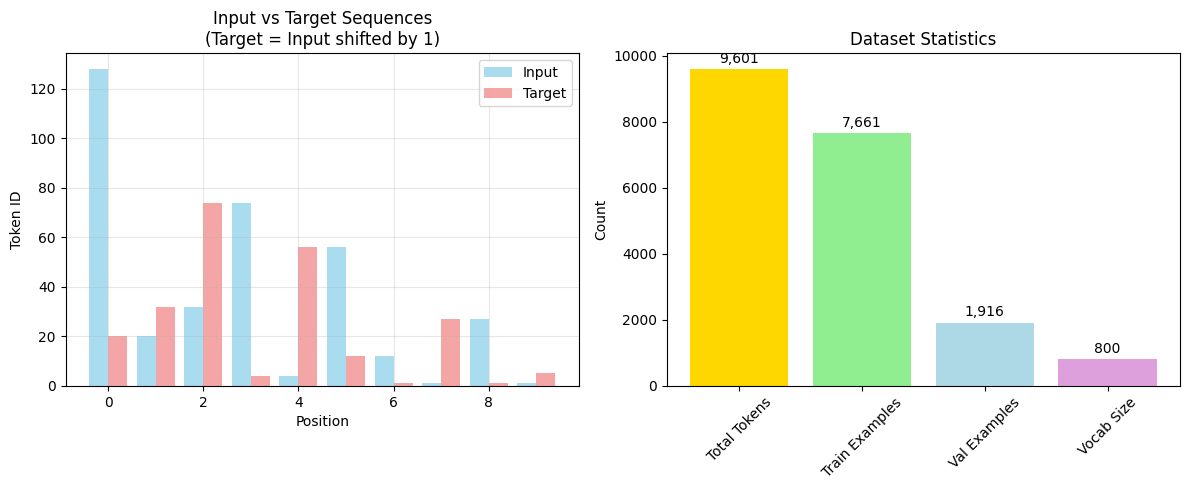


🎯 Key Takeaways:
   • We have 9,577 training examples
   • Each example teaches: given 24 words, predict the next
   • Model will learn patterns from these examples
   • Attention (coming next) helps focus on important words

🚀 Ready to build the neural network!


In [8]:
# Cell 6: Visualize How Training Works
import matplotlib.pyplot as plt
import numpy as np

def visualize_training_concept():
    """
    Show visually how language model training works
    """
    print("🎓 HOW LANGUAGE MODEL TRAINING WORKS")
    print("="*60)
    
    # Example sentence
    sentence = "the cat sat on the mat"
    words = sentence.split()
    
    print("📝 Example: Training on 'the cat sat on the mat'")
    print("\nThe model learns by predicting the NEXT word:")
    print()
    
    # Show all training examples from this sentence
    for i in range(len(words) - 1):
        input_words = words[:i+1]
        next_word = words[i+1]
        
        input_str = " ".join(input_words)
        print(f"   Given: '{input_str}' → Predict: '{next_word}'")
    
    print("\n🧠 After training on millions of examples like this,")
    print("   the model learns patterns and can generate new text!")

def visualize_attention_concept():
    """
    Show what attention mechanism does (we'll build this later)
    """
    print(f"\n👁️  ATTENTION MECHANISM (Coming Soon)")
    print("="*60)
    
    sentence = ["the", "cat", "sat", "on", "the", "mat"]
    
    print("When predicting the next word after 'the cat sat on the',")
    print("attention helps the model focus on relevant words:")
    print()
    
    # Simulate attention weights (higher = more important)
    attention_weights = [0.1, 0.3, 0.4, 0.2, 0.0, 0.0]
    
    for word, weight in zip(sentence, attention_weights):
        bar = "█" * int(weight * 20)  # Visual bar
        print(f"   '{word}': {bar} ({weight:.1f})")
    
    print("\n   The model pays most attention to 'sat' and 'cat'")
    print("   because they're most relevant for predicting 'mat'!")

# Show the concepts
visualize_training_concept()
visualize_attention_concept()

# Create a simple visualization of our dataset structure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Show sequence structure
sample_input = input_batch[0][:10].numpy()  # First 10 tokens
sample_target = target_batch[0][:10].numpy()

x = range(10)
axes[0].bar([i-0.2 for i in x], sample_input, width=0.4, label='Input', alpha=0.7, color='skyblue')
axes[0].bar([i+0.2 for i in x], sample_target, width=0.4, label='Target', alpha=0.7, color='lightcoral')
axes[0].set_title('Input vs Target Sequences\n(Target = Input shifted by 1)')
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Token ID')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Dataset size visualization
categories = ['Total Tokens', 'Train Examples', 'Val Examples', 'Vocab Size']
values = [len(dataset.tokens), len(train_dataset), len(val_dataset), len(tokenizer.vocab)]

axes[1].bar(categories, values, color=['gold', 'lightgreen', 'lightblue', 'plum'])
axes[1].set_title('Dataset Statistics')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, v in enumerate(values):
    axes[1].text(i, v + max(values)*0.01, f'{v:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n🎯 Key Takeaways:")
print(f"   • We have {len(dataset):,} training examples")
print(f"   • Each example teaches: given {seq_length} words, predict the next")
print(f"   • Model will learn patterns from these examples")
print(f"   • Attention (coming next) helps focus on important words")
print(f"\n🚀 Ready to build the neural network!")

🧪 TESTING POSITIONAL ENCODING
🎯 Creating Positional Encoding:
   Embedding size: 128
   Max sequence length: 100
   ✅ Positional encoding created!
Input embeddings shape: torch.Size([2, 10, 128])
After positional encoding: torch.Size([2, 10, 128])

Before position encoding (first word, first 5 dims): tensor([-0.3091, -0.2724,  0.3803, -1.9149,  0.9736])
After position encoding (first word, first 5 dims):  tensor([-0.3091,  0.7276,  0.3803, -0.9149,  0.9736])
↑ Notice how the values changed - position info was added!

🔍 VISUALIZING POSITIONAL ENCODING
🎯 Creating Positional Encoding:
   Embedding size: 64
   Max sequence length: 50
   ✅ Positional encoding created!


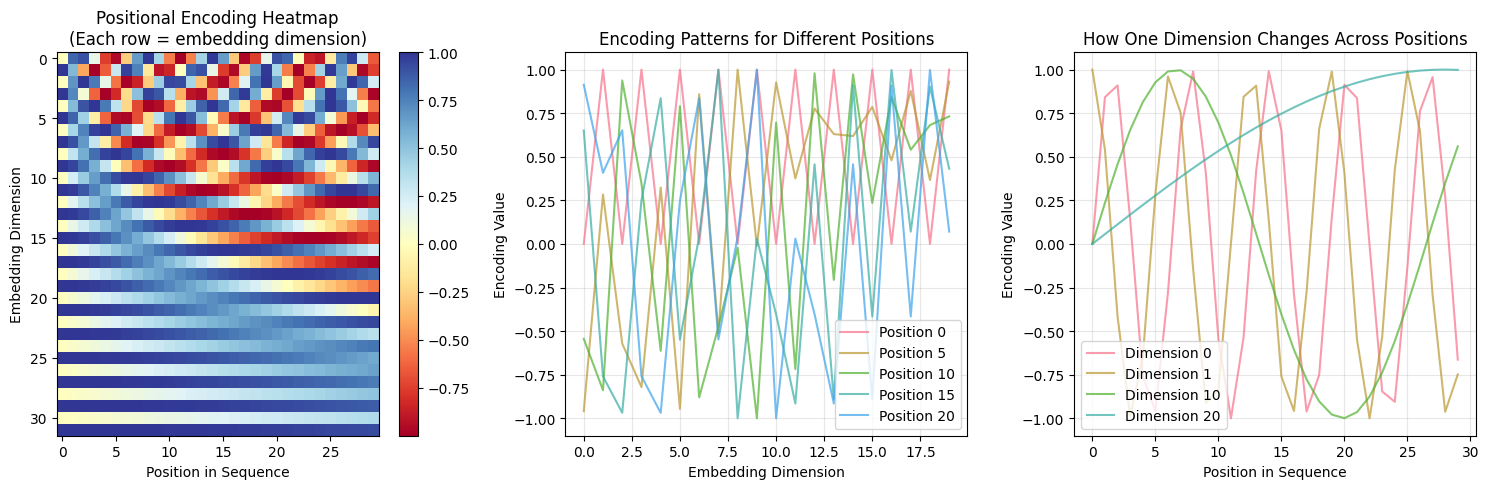

🎯 Key Points:
   • Each position gets a unique 'fingerprint'
   • Model can now tell 'cat sat' from 'sat cat'
   • Same words at different positions = different encodings

✅ Positional Encoding ready!
🚀 Next: Building Attention Mechanism!


In [9]:
# Cell 7: Build Positional Encoding (Helps model understand word positions)
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt

class PositionalEncoding(nn.Module):
    """
    Positional Encoding: Tells the model WHERE each word is in the sentence
    
    Problem: Neural networks don't naturally understand word order
    Solution: Add special numbers to each word based on its position
    
    Example: "cat sat mat" vs "mat sat cat" - same words, different meaning!
    """
    
    def __init__(self, d_model, max_length=1000):
        super().__init__()
        
        print(f"🎯 Creating Positional Encoding:")
        print(f"   Embedding size: {d_model}")
        print(f"   Max sequence length: {max_length}")
        
        # Create a matrix to store position encodings
        # Shape: [max_length, d_model]
        pe = torch.zeros(max_length, d_model)
        
        # Create position indices: [0, 1, 2, 3, ...]
        position = torch.arange(0, max_length).float().unsqueeze(1)
        
        # Create the encoding using sine and cosine waves
        # This creates a unique "fingerprint" for each position
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * 
                           -(math.log(10000.0) / d_model))
        
        # Even dimensions get sine, odd dimensions get cosine
        pe[:, 0::2] = torch.sin(position * div_term)  # Even indices
        pe[:, 1::2] = torch.cos(position * div_term)  # Odd indices
        
        # Register as buffer (won't be trained, but will move with model to GPU)
        self.register_buffer('pe', pe.unsqueeze(0))
        
        print(f"   ✅ Positional encoding created!")
        
    def forward(self, x):
        """
        Add position information to word embeddings
        x shape: [batch_size, sequence_length, embedding_size]
        """
        # Add positional encoding to embeddings
        # Only use the positions we need (up to sequence length)
        seq_len = x.size(1)
        x = x + self.pe[:, :seq_len]
        return x

def visualize_positional_encoding():
    """Show what positional encoding looks like"""
    print("\n🔍 VISUALIZING POSITIONAL ENCODING")
    print("="*50)
    
    # Create a small positional encoding for visualization
    d_model = 64  # Embedding dimension
    max_length = 50  # Sequence length
    
    pe = PositionalEncoding(d_model, max_length)
    
    # Get the encoding matrix
    encoding = pe.pe[0].numpy()  # Remove batch dimension
    
    # Create visualization
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Plot 1: Heatmap of positional encodings
    im1 = axes[0].imshow(encoding[:30, :32].T, cmap='RdYlBu', aspect='auto')
    axes[0].set_title('Positional Encoding Heatmap\n(Each row = embedding dimension)')
    axes[0].set_xlabel('Position in Sequence')
    axes[0].set_ylabel('Embedding Dimension')
    plt.colorbar(im1, ax=axes[0])
    
    # Plot 2: Show how encoding changes for different positions
    positions_to_show = [0, 5, 10, 15, 20]
    for pos in positions_to_show:
        axes[1].plot(encoding[pos, :20], label=f'Position {pos}', alpha=0.7)
    axes[1].set_title('Encoding Patterns for Different Positions')
    axes[1].set_xlabel('Embedding Dimension')
    axes[1].set_ylabel('Encoding Value')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Show how one dimension changes across positions
    dimensions_to_show = [0, 1, 10, 20]
    for dim in dimensions_to_show:
        axes[2].plot(encoding[:30, dim], label=f'Dimension {dim}', alpha=0.7)
    axes[2].set_title('How One Dimension Changes Across Positions')
    axes[2].set_xlabel('Position in Sequence')
    axes[2].set_ylabel('Encoding Value')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("🎯 Key Points:")
    print("   • Each position gets a unique 'fingerprint'")
    print("   • Model can now tell 'cat sat' from 'sat cat'")
    print("   • Same words at different positions = different encodings")

# Test positional encoding
print("🧪 TESTING POSITIONAL ENCODING")
print("="*50)

# Create a test
d_model = 128  # Embedding size we'll use for our model
pe = PositionalEncoding(d_model, max_length=100)

# Simulate some word embeddings (random for now)
batch_size = 2
seq_length = 10
test_embeddings = torch.randn(batch_size, seq_length, d_model)

print(f"Input embeddings shape: {test_embeddings.shape}")

# Add positional encoding
encoded_embeddings = pe(test_embeddings)
print(f"After positional encoding: {encoded_embeddings.shape}")

# Show the difference
print(f"\nBefore position encoding (first word, first 5 dims): {test_embeddings[0, 0, :5]}")
print(f"After position encoding (first word, first 5 dims):  {encoded_embeddings[0, 0, :5]}")
print("↑ Notice how the values changed - position info was added!")

# Visualize the positional encoding
visualize_positional_encoding()

print("\n✅ Positional Encoding ready!")
print("🚀 Next: Building Attention Mechanism!")

In [11]:
# Cell 8: Build Multi-Head Attention (FIXED VERSION)
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import matplotlib.pyplot as plt

class MultiHeadAttention(nn.Module):
    """
    Multi-Head Attention: Lets the model focus on different parts of the input
    
    Think of it like: When you read "The cat sat on the mat"
    - Head 1 might focus on subject-verb relationships: "cat" -> "sat"
    - Head 2 might focus on spatial relationships: "sat" -> "on" -> "mat"
    - Head 3 might focus on article-noun relationships: "the" -> "cat"
    
    Multiple heads = multiple ways of paying attention!
    """
    
    def __init__(self, d_model, num_heads, dropout=0.1):
        super().__init__()
        
        # Make sure embedding dimension is divisible by number of heads
        assert d_model % num_heads == 0, f"d_model ({d_model}) must be divisible by num_heads ({num_heads})"
        
        self.d_model = d_model          # Total embedding dimension
        self.num_heads = num_heads      # Number of attention heads
        self.d_k = d_model // num_heads # Dimension per head
        
        print(f"🧠 Creating Multi-Head Attention:")
        print(f"   Total embedding dim: {d_model}")
        print(f"   Number of heads: {num_heads}")
        print(f"   Dimension per head: {self.d_k}")
        
        # Linear layers to create Query, Key, Value matrices
        # Think: Query = "what am I looking for?"
        #        Key = "what do I have?"
        #        Value = "what information do I contain?"
        self.W_q = nn.Linear(d_model, d_model, bias=False)  # Query projection
        self.W_k = nn.Linear(d_model, d_model, bias=False)  # Key projection  
        self.W_v = nn.Linear(d_model, d_model, bias=False)  # Value projection
        self.W_o = nn.Linear(d_model, d_model)              # Output projection
        
        self.dropout = nn.Dropout(dropout)
        
        print(f"   ✅ Attention mechanism created!")
    
    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        """
        Core attention mechanism:
        1. Calculate how much each word should attend to every other word
        2. Use those weights to combine the values
        
        Attention(Q,K,V) = softmax(QK^T / sqrt(d_k))V
        """
        
        # Step 1: Calculate attention scores
        # Q @ K^T tells us how much each query cares about each key
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        
        # Step 2: Apply mask if provided (for decoder - prevent looking at future words)
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)
        
        # Step 3: Convert scores to probabilities (attention weights)
        attention_weights = F.softmax(scores, dim=-1)
        attention_weights = self.dropout(attention_weights)
        
        # Step 4: Apply attention weights to values
        output = torch.matmul(attention_weights, V)
        
        return output, attention_weights
    
    def forward(self, query, key, value, mask=None):
        """
        Forward pass through multi-head attention
        """
        batch_size, seq_length = query.size(0), query.size(1)
        
        # Step 1: Create Q, K, V matrices
        Q = self.W_q(query)  # [batch, seq_len, d_model]
        K = self.W_k(key)    # [batch, seq_len, d_model]  
        V = self.W_v(value)  # [batch, seq_len, d_model]
        
        # Step 2: Reshape for multi-head attention
        # Split d_model into num_heads pieces
        Q = Q.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)
        K = K.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)  
        V = V.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)  # FIXED: Added num_heads
        # Now shape: [batch, num_heads, seq_len, d_k]
        
        print(f"   Debug shapes after reshaping:")
        print(f"     Q: {Q.shape}")
        print(f"     K: {K.shape}") 
        print(f"     V: {V.shape}")
        
        # Step 3: Apply attention for each head
        attn_output, attention_weights = self.scaled_dot_product_attention(Q, K, V, mask)
        
        # Step 4: Concatenate heads back together
        attn_output = attn_output.transpose(1, 2).contiguous().view(
            batch_size, seq_length, self.d_model)
        
        # Step 5: Final linear transformation
        output = self.W_o(attn_output)
        
        return output, attention_weights

def create_causal_mask(seq_length):
    """
    Create a mask that prevents the model from looking at future words
    This is crucial for language modeling - we can't cheat by seeing the answer!
    
    Returns a lower triangular matrix:
    [[1, 0, 0],
     [1, 1, 0], 
     [1, 1, 1]]
    """
    mask = torch.tril(torch.ones(seq_length, seq_length))
    return mask.unsqueeze(0).unsqueeze(0)  # Add batch and head dimensions

def test_attention_step_by_step():
    """Test attention step by step to understand what happens"""
    print("🔍 STEP-BY-STEP ATTENTION TEST")
    print("="*50)
    
    d_model = 128
    num_heads = 8
    seq_length = 24
    batch_size = 2
    
    # Create attention module
    mha = MultiHeadAttention(d_model, num_heads)
    
    # Create test input
    test_input = torch.randn(batch_size, seq_length, d_model)
    print(f"1. Input shape: {test_input.shape}")
    
    # Create mask
    mask = create_causal_mask(seq_length)
    print(f"2. Mask shape: {mask.shape}")
    
    # Test just the linear transformations first
    print(f"\n3. Testing linear transformations:")
    with torch.no_grad():
        Q = mha.W_q(test_input)
        K = mha.W_k(test_input)
        V = mha.W_v(test_input)
        print(f"   Q shape after linear: {Q.shape}")
        print(f"   K shape after linear: {K.shape}")
        print(f"   V shape after linear: {V.shape}")
    
    # Test the full forward pass
    print(f"\n4. Testing full attention:")
    with torch.no_grad():
        output, attention_weights = mha(test_input, test_input, test_input, mask)
    
    print(f"   ✅ Success!")
    print(f"   Output shape: {output.shape}")
    print(f"   Attention weights shape: {attention_weights.shape}")
    
    return mha, output, attention_weights

# Run the step-by-step test
mha, output, attention_weights = test_attention_step_by_step()

🔍 STEP-BY-STEP ATTENTION TEST
🧠 Creating Multi-Head Attention:
   Total embedding dim: 128
   Number of heads: 8
   Dimension per head: 16
   ✅ Attention mechanism created!
1. Input shape: torch.Size([2, 24, 128])
2. Mask shape: torch.Size([1, 1, 24, 24])

3. Testing linear transformations:
   Q shape after linear: torch.Size([2, 24, 128])
   K shape after linear: torch.Size([2, 24, 128])
   V shape after linear: torch.Size([2, 24, 128])

4. Testing full attention:
   Debug shapes after reshaping:
     Q: torch.Size([2, 8, 24, 16])
     K: torch.Size([2, 8, 24, 16])
     V: torch.Size([2, 8, 24, 16])
   ✅ Success!
   Output shape: torch.Size([2, 24, 128])
   Attention weights shape: torch.Size([2, 8, 24, 24])



🔍 DETAILED ATTENTION VISUALIZATION


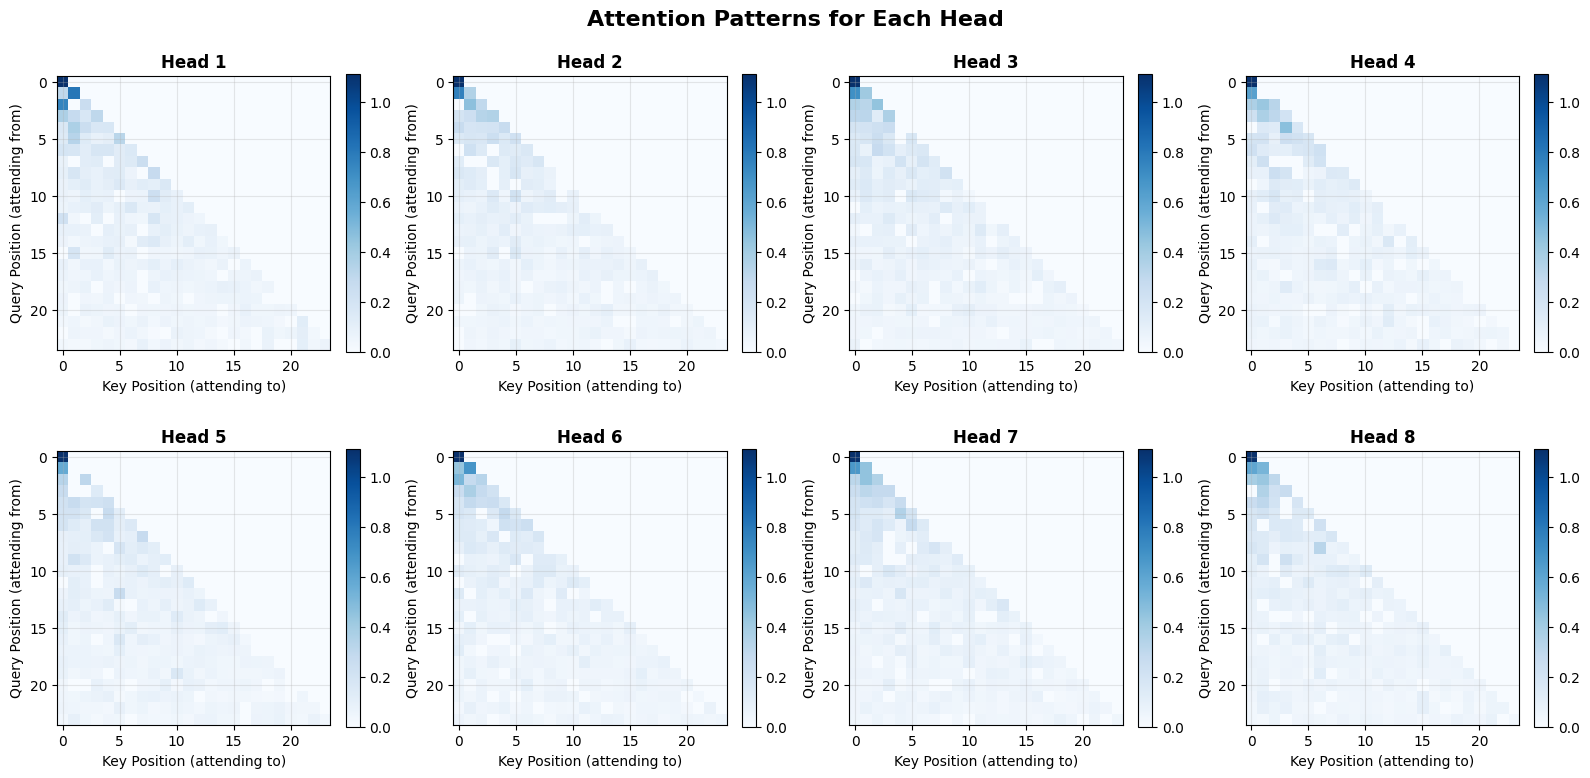

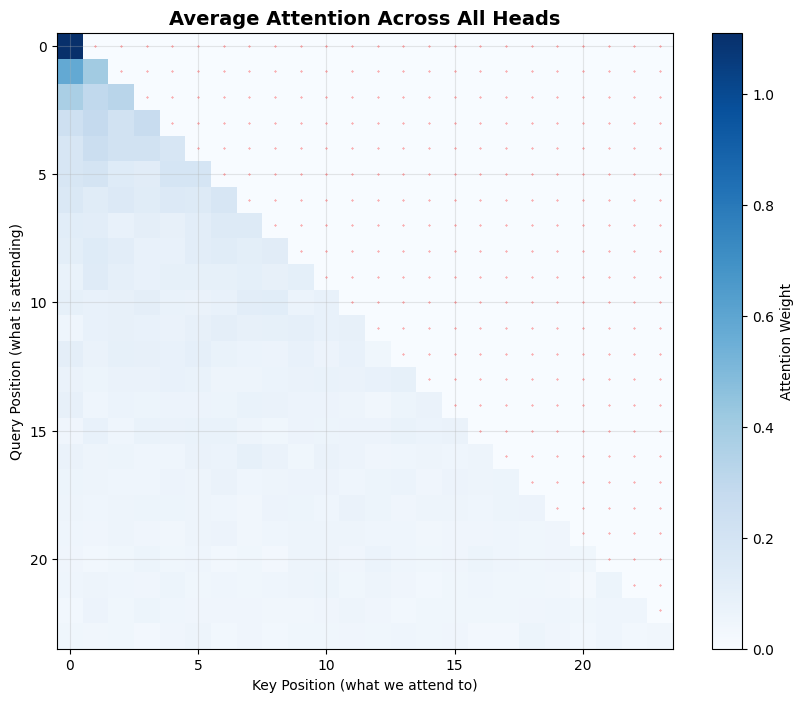

🎯 What you're seeing:
   • Darker blue = stronger attention
   • Each head learns different patterns
   • Red X's show where causal mask blocks attention
   • Model can only look at current and previous positions

🚫 CAUSAL MASK VISUALIZATION


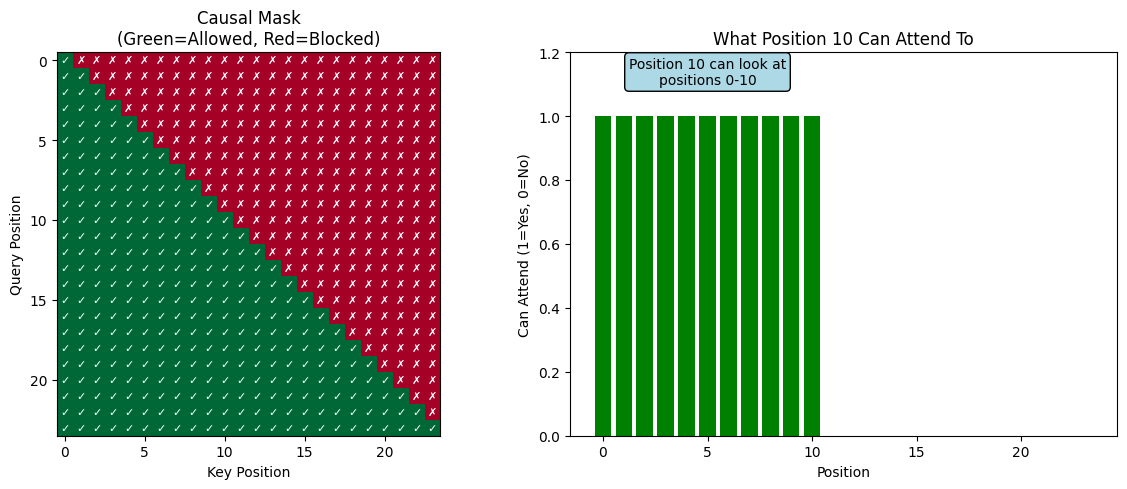

🎯 Key Points:
   • Position 10 can only see positions 0 through 10
   • This prevents the model from 'cheating' by seeing future words
   • Essential for language modeling - we predict NEXT word, not current!

✅ Multi-Head Attention working perfectly!
🚀 Next: Building Feed Forward Network!


In [12]:
# Cell 9: Visualize Attention Patterns
def visualize_attention_detailed(attention_weights, seq_length=24):
    """Show detailed attention patterns"""
    print("\n🔍 DETAILED ATTENTION VISUALIZATION")
    print("="*50)
    
    # Get attention from first batch, all heads
    attn = attention_weights[0].detach().numpy()  # Shape: [num_heads, seq_len, seq_len]
    num_heads = attn.shape[0]
    
    # Create a big visualization
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    fig.suptitle('Attention Patterns for Each Head', fontsize=16, fontweight='bold')
    
    for head in range(min(8, num_heads)):
        row, col = head // 4, head % 4
        
        # Get attention matrix for this head
        attn_matrix = attn[head]
        
        # Create heatmap
        im = axes[row, col].imshow(attn_matrix, cmap='Blues', vmin=0, vmax=attn_matrix.max())
        axes[row, col].set_title(f'Head {head + 1}', fontweight='bold')
        axes[row, col].set_xlabel('Key Position (attending to)')
        axes[row, col].set_ylabel('Query Position (attending from)')
        
        # Add colorbar
        plt.colorbar(im, ax=axes[row, col], fraction=0.046)
        
        # Make it look nice
        axes[row, col].grid(True, alpha=0.3)
        axes[row, col].set_xticks(range(0, seq_length, 5))
        axes[row, col].set_yticks(range(0, seq_length, 5))
    
    plt.tight_layout()
    plt.show()
    
    # Show average attention across all heads
    avg_attention = attn.mean(axis=0)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(avg_attention, cmap='Blues', vmin=0, vmax=avg_attention.max())
    plt.title('Average Attention Across All Heads', fontsize=14, fontweight='bold')
    plt.xlabel('Key Position (what we attend to)')
    plt.ylabel('Query Position (what is attending)')
    plt.colorbar(label='Attention Weight')
    
    # Add grid and ticks
    plt.grid(True, alpha=0.3)
    plt.xticks(range(0, seq_length, 5))
    plt.yticks(range(0, seq_length, 5))
    
    # Highlight the causal pattern
    for i in range(seq_length):
        for j in range(i+1, seq_length):
            plt.plot(j, i, 'rx', markersize=1, alpha=0.3)  # Show where attention is blocked
    
    plt.show()
    
    print("🎯 What you're seeing:")
    print("   • Darker blue = stronger attention")
    print("   • Each head learns different patterns")
    print("   • Red X's show where causal mask blocks attention")
    print("   • Model can only look at current and previous positions")

def show_causal_mask_effect(seq_length=24):
    """Show how the causal mask works"""
    print("\n🚫 CAUSAL MASK VISUALIZATION")
    print("="*50)
    
    mask = create_causal_mask(seq_length)
    mask_matrix = mask[0, 0].numpy()
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Show the mask
    axes[0].imshow(mask_matrix, cmap='RdYlGn', vmin=0, vmax=1)
    axes[0].set_title('Causal Mask\n(Green=Allowed, Red=Blocked)')
    axes[0].set_xlabel('Key Position')
    axes[0].set_ylabel('Query Position')
    
    # Add checkmarks and X's
    for i in range(seq_length):
        for j in range(seq_length):
            if mask_matrix[i, j] == 1:
                axes[0].text(j, i, '✓', ha='center', va='center', color='white', fontsize=8)
            else:
                axes[0].text(j, i, '✗', ha='center', va='center', color='white', fontsize=8)
    
    # Show what this means for a specific position
    query_pos = 10  # Look at position 10
    allowed_positions = mask_matrix[query_pos]
    
    axes[1].bar(range(seq_length), allowed_positions, color=['green' if x == 1 else 'red' for x in allowed_positions])
    axes[1].set_title(f'What Position {query_pos} Can Attend To')
    axes[1].set_xlabel('Position')
    axes[1].set_ylabel('Can Attend (1=Yes, 0=No)')
    axes[1].set_ylim(0, 1.2)
    
    # Add text
    axes[1].text(query_pos/2, 1.1, f'Position {query_pos} can look at\npositions 0-{query_pos}', 
                ha='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
    
    plt.tight_layout()
    plt.show()
    
    print("🎯 Key Points:")
    print(f"   • Position {query_pos} can only see positions 0 through {query_pos}")
    print("   • This prevents the model from 'cheating' by seeing future words")
    print("   • Essential for language modeling - we predict NEXT word, not current!")

# Run the visualizations
visualize_attention_detailed(attention_weights)
show_causal_mask_effect()

print("\n✅ Multi-Head Attention working perfectly!")
print("🚀 Next: Building Feed Forward Network!")

🧪 TESTING FEED FORWARD NETWORK
🔧 Creating Feed Forward Network:
   Input/Output dimension: 128
   Hidden dimension: 512
   Expansion factor: 4.0x
   ✅ Feed forward network created!
Test input shape: torch.Size([2, 24, 128])
Output shape: torch.Size([2, 24, 128])
Input and output shapes match: True
Input norm: 77.812
Output norm: 19.900
Information preserved: ✅

🔍 VISUALIZING FEED FORWARD NETWORK
🔧 Creating Feed Forward Network:
   Input/Output dimension: 128
   Hidden dimension: 512
   Expansion factor: 4.0x
   ✅ Feed forward network created!
Input shape: torch.Size([2, 24, 128])
After expansion: torch.Size([2, 24, 512])
After ReLU: torch.Size([2, 24, 512])
Final output: torch.Size([2, 24, 128])


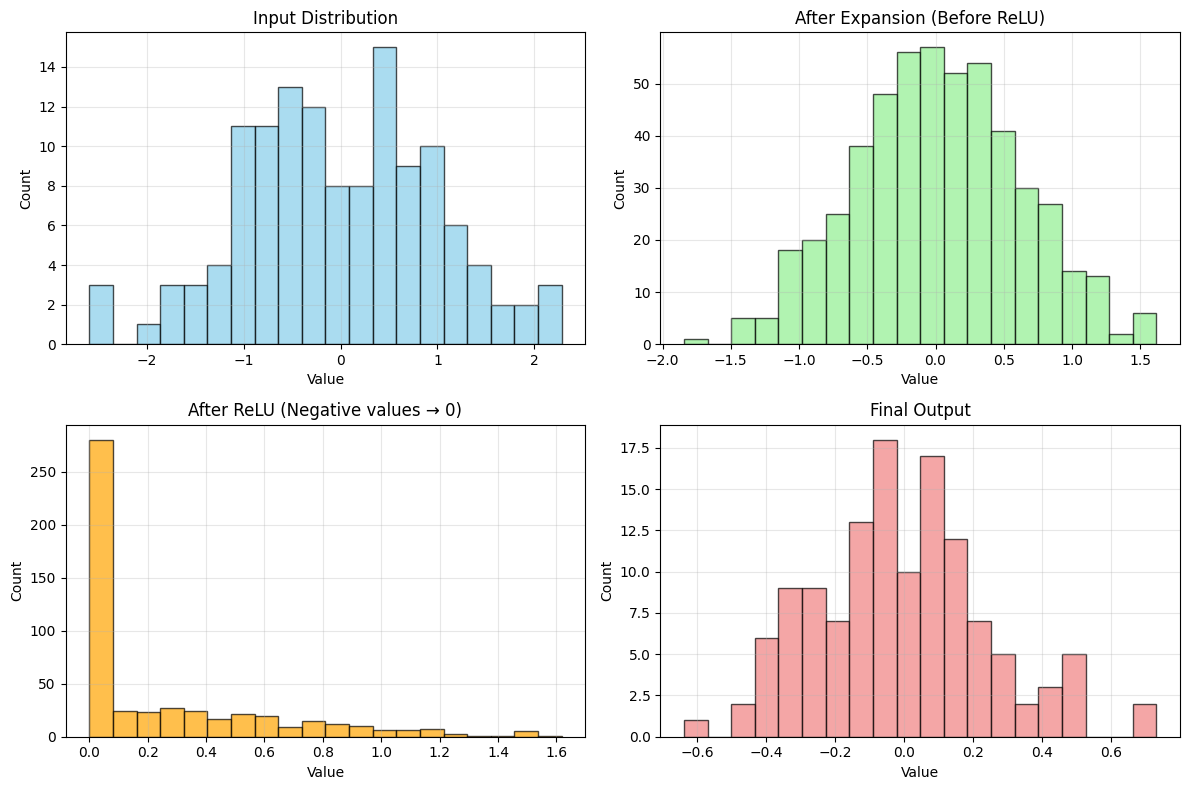

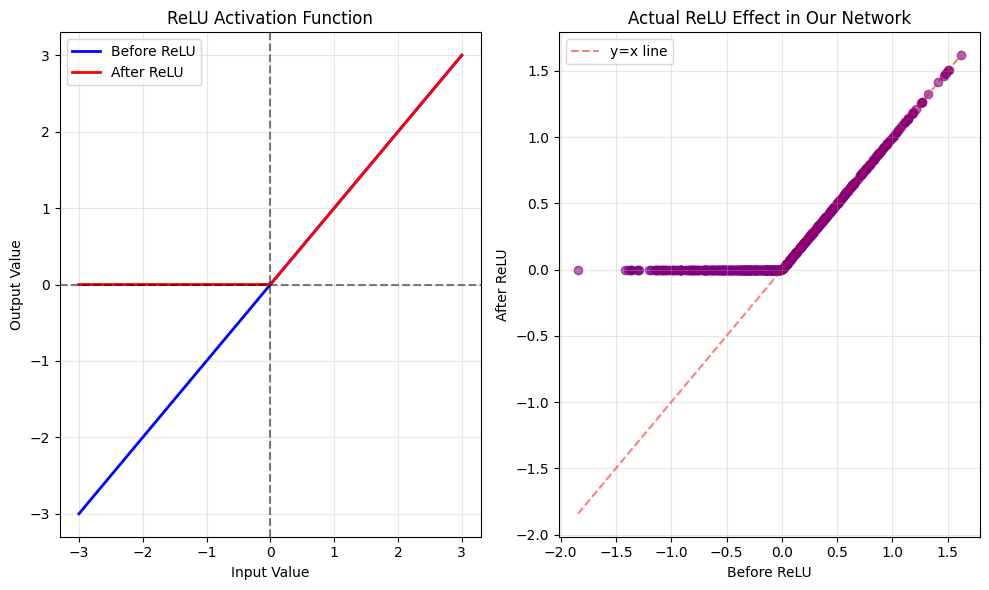

🎯 Key Points:
   • Feed forward expands then compresses information
   • ReLU removes negative values (adds non-linearity)
   • This lets the model learn complex patterns
   • Each position is processed independently

✅ Feed Forward Network working perfectly!
🚀 Next: Combining everything into a Transformer Block!


In [13]:
# Cell 10: Build Feed Forward Network (Simple but Powerful!)
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

class FeedForward(nn.Module):
   """
   Feed Forward Network: Processes each position independently
   
   Think of it like: After attention tells us WHAT to focus on,
   feed forward decides WHAT TO DO with that information
   
   Architecture: Linear -> ReLU -> Dropout -> Linear
   - Expands to larger dimension (gives more "thinking space")
   - Then compresses back to original size
   """
   
   def __init__(self, d_model, d_ff, dropout=0.1):
       super().__init__()
       
       self.d_model = d_model  # Input/output dimension
       self.d_ff = d_ff        # Hidden dimension (usually 4x larger)
       
       print(f"🔧 Creating Feed Forward Network:")
       print(f"   Input/Output dimension: {d_model}")
       print(f"   Hidden dimension: {d_ff}")
       print(f"   Expansion factor: {d_ff/d_model:.1f}x")
       
       # Two linear layers
       self.linear1 = nn.Linear(d_model, d_ff)    # Expand
       self.linear2 = nn.Linear(d_ff, d_model)    # Compress back
       self.dropout = nn.Dropout(dropout)
       
       print(f"   ✅ Feed forward network created!")
   
   def forward(self, x):
       """
       Forward pass:
       1. Expand to larger dimension
       2. Apply ReLU activation (adds non-linearity)
       3. Apply dropout (prevents overfitting)
       4. Compress back to original dimension
       """
       # Step 1: Expand and activate
       x = F.relu(self.linear1(x))  # [batch, seq_len, d_ff]
       
       # Step 2: Dropout for regularization
       x = self.dropout(x)
       
       # Step 3: Compress back
       x = self.linear2(x)  # [batch, seq_len, d_model]
       
       return x

def visualize_feedforward():
   """Show what happens inside the feed forward network"""
   print("\n🔍 VISUALIZING FEED FORWARD NETWORK")
   print("="*50)
   
   d_model = 128
   d_ff = 512  # 4x expansion
   seq_length = 24
   batch_size = 2
   
   # Create feed forward network
   ff = FeedForward(d_model, d_ff)
   
   # Create test input
   test_input = torch.randn(batch_size, seq_length, d_model)
   print(f"Input shape: {test_input.shape}")
   
   # Track what happens at each step
   with torch.no_grad():
       # Step 1: First linear layer (expansion)
       expanded = ff.linear1(test_input)
       print(f"After expansion: {expanded.shape}")
       
       # Step 2: ReLU activation
       activated = F.relu(expanded)
       print(f"After ReLU: {activated.shape}")
       
       # Step 3: Final linear layer (compression)
       output = ff.linear2(activated)
       print(f"Final output: {output.shape}")
   
   # Visualize the transformations
   fig, axes = plt.subplots(2, 2, figsize=(12, 8))
   
   # Plot 1: Input distribution
   input_flat = test_input[0, 0, :].numpy()  # First sequence, first position
   axes[0, 0].hist(input_flat, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
   axes[0, 0].set_title('Input Distribution')
   axes[0, 0].set_xlabel('Value')
   axes[0, 0].set_ylabel('Count')
   axes[0, 0].grid(True, alpha=0.3)
   
   # Plot 2: After expansion (before ReLU)
   expanded_flat = expanded[0, 0, :].numpy()
   axes[0, 1].hist(expanded_flat, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
   axes[0, 1].set_title('After Expansion (Before ReLU)')
   axes[0, 1].set_xlabel('Value')
   axes[0, 1].set_ylabel('Count')
   axes[0, 1].grid(True, alpha=0.3)
   
   # Plot 3: After ReLU (showing effect of activation)
   activated_flat = activated[0, 0, :].numpy()
   axes[1, 0].hist(activated_flat, bins=20, alpha=0.7, color='orange', edgecolor='black')
   axes[1, 0].set_title('After ReLU (Negative values → 0)')
   axes[1, 0].set_xlabel('Value')
   axes[1, 0].set_ylabel('Count')
   axes[1, 0].grid(True, alpha=0.3)
   
   # Plot 4: Final output
   output_flat = output[0, 0, :].numpy()
   axes[1, 1].hist(output_flat, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
   axes[1, 1].set_title('Final Output')
   axes[1, 1].set_xlabel('Value')
   axes[1, 1].set_ylabel('Count')
   axes[1, 1].grid(True, alpha=0.3)
   
   plt.tight_layout()
   plt.show()
   
   # Show effect of ReLU
   plt.figure(figsize=(10, 6))
   
   # Plot before and after ReLU
   sample_values = np.linspace(-3, 3, 100)
   relu_values = np.maximum(0, sample_values)
   
   plt.subplot(1, 2, 1)
   plt.plot(sample_values, sample_values, 'b-', label='Before ReLU', linewidth=2)
   plt.plot(sample_values, relu_values, 'r-', label='After ReLU', linewidth=2)
   plt.xlabel('Input Value')
   plt.ylabel('Output Value')
   plt.title('ReLU Activation Function')
   plt.legend()
   plt.grid(True, alpha=0.3)
   plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
   plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
   
   # Show actual values from our network
   plt.subplot(1, 2, 2)
   plt.scatter(expanded_flat, activated_flat, alpha=0.6, color='purple')
   plt.xlabel('Before ReLU')
   plt.ylabel('After ReLU')
   plt.title('Actual ReLU Effect in Our Network')
   plt.grid(True, alpha=0.3)
   
   # Add diagonal line to show where values don't change
   max_val = max(expanded_flat.max(), activated_flat.max())
   min_val = min(expanded_flat.min(), 0)
   plt.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.5, label='y=x line')
   plt.legend()
   
   plt.tight_layout()
   plt.show()
   
   print("🎯 Key Points:")
   print("   • Feed forward expands then compresses information")
   print("   • ReLU removes negative values (adds non-linearity)")
   print("   • This lets the model learn complex patterns")
   print("   • Each position is processed independently")

# Test the feed forward network
print("🧪 TESTING FEED FORWARD NETWORK")
print("="*50)

d_model = 128
d_ff = 512  # Standard 4x expansion

ff = FeedForward(d_model, d_ff)

# Test with our sequence dimensions
batch_size = 2
seq_length = 24
test_input = torch.randn(batch_size, seq_length, d_model)

print(f"Test input shape: {test_input.shape}")

# Run forward pass
with torch.no_grad():
   output = ff(test_input)

print(f"Output shape: {output.shape}")
print(f"Input and output shapes match: {test_input.shape == output.shape}")

# Check that we didn't lose information
input_norm = torch.norm(test_input)
output_norm = torch.norm(output)
print(f"Input norm: {input_norm:.3f}")
print(f"Output norm: {output_norm:.3f}")
print(f"Information preserved: {'✅' if output_norm > 0 else '❌'}")

# Visualize the feed forward transformations
visualize_feedforward()

print("\n✅ Feed Forward Network working perfectly!")
print("🚀 Next: Combining everything into a Transformer Block!")

🧪 TESTING SINGLE TRANSFORMER BLOCK (FIXED)
🏗️  Building Transformer Block:
   Model dimension: 128
   Attention heads: 8
   Feed forward dimension: 512
   Dropout rate: 0.1
🧠 Creating Multi-Head Attention:
   Total embedding dim: 128
   Number of heads: 8
   Dimension per head: 16
   ✅ Attention mechanism created!
🔧 Creating Feed Forward Network:
   Input/Output dimension: 128
   Hidden dimension: 512
   Expansion factor: 4.0x
   ✅ Feed forward network created!
   ✅ Transformer block created!
Test input shape: torch.Size([2, 24, 128])
   Debug shapes after reshaping:
     Q: torch.Size([2, 8, 24, 16])
     K: torch.Size([2, 8, 24, 16])
     V: torch.Size([2, 8, 24, 16])
Output shape: torch.Size([2, 24, 128])
Same shape as input: ✅

🔍 VISUALIZING TRANSFORMER BLOCK
🏗️  Building Transformer Block:
   Model dimension: 128
   Attention heads: 8
   Feed forward dimension: 512
   Dropout rate: 0.1
🧠 Creating Multi-Head Attention:
   Total embedding dim: 128
   Number of heads: 8
   Dimension 

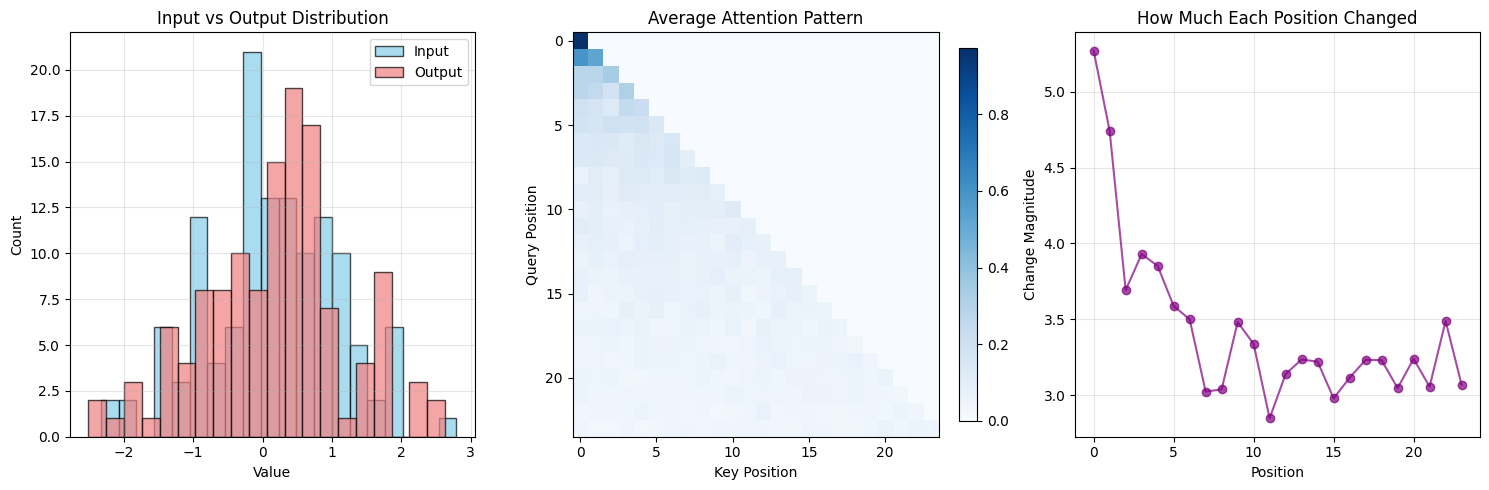

🎯 Key Insights:
   • Input and output have similar distributions (residual connections)
   • Attention focuses on allowed positions (causal mask)
   • Some positions change more than others (selective updates)

🏗️  TESTING MULTIPLE TRANSFORMER BLOCKS
🏗️  Building Transformer Block:
   Model dimension: 128
   Attention heads: 8
   Feed forward dimension: 512
   Dropout rate: 0.1
🧠 Creating Multi-Head Attention:
   Total embedding dim: 128
   Number of heads: 8
   Dimension per head: 16
   ✅ Attention mechanism created!
🔧 Creating Feed Forward Network:
   Input/Output dimension: 128
   Hidden dimension: 512
   Expansion factor: 4.0x
   ✅ Feed forward network created!
   ✅ Transformer block created!
🏗️  Building Transformer Block:
   Model dimension: 128
   Attention heads: 8
   Feed forward dimension: 512
   Dropout rate: 0.1
🧠 Creating Multi-Head Attention:
   Total embedding dim: 128
   Number of heads: 8
   Dimension per head: 16
   ✅ Attention mechanism created!
🔧 Creating Feed Forwa

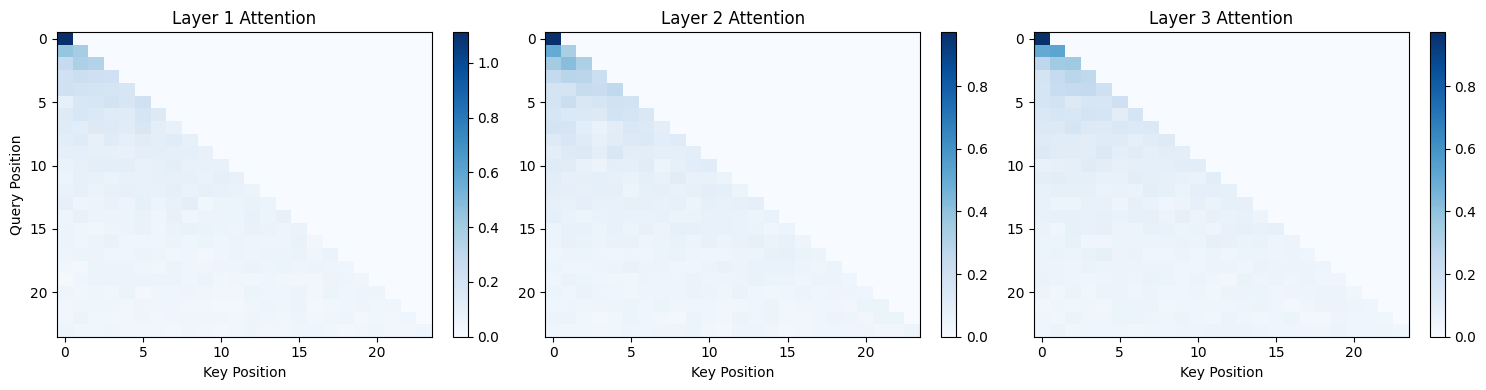

🎯 Notice how attention patterns differ across layers!
   • Early layers: focus on nearby positions
   • Later layers: more complex, long-range patterns

✅ Transformer Block working perfectly!
🚀 Next: Building the complete GPT model!


In [15]:
# Cell 11: Build Complete Transformer Block (FIXED VERSION)
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class TransformerBlock(nn.Module):
    """
    Complete Transformer Block: The core building block of GPT
    
    Structure:
    1. Multi-Head Attention (with residual connection + layer norm)
    2. Feed Forward Network (with residual connection + layer norm)
    
    Residual connections: Help gradients flow during training
    Layer normalization: Stabilizes training
    """
    
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super().__init__()
        
        print(f"🏗️  Building Transformer Block:")
        print(f"   Model dimension: {d_model}")
        print(f"   Attention heads: {num_heads}")
        print(f"   Feed forward dimension: {d_ff}")
        print(f"   Dropout rate: {dropout}")
        
        # Components
        self.attention = MultiHeadAttention(d_model, num_heads, dropout)
        self.feed_forward = FeedForward(d_model, d_ff, dropout)
        
        # Layer normalization (helps with training stability)
        self.norm1 = nn.LayerNorm(d_model)  # After attention
        self.norm2 = nn.LayerNorm(d_model)  # After feed forward
        
        # Dropout for regularization
        self.dropout = nn.Dropout(dropout)
        
        print(f"   ✅ Transformer block created!")
    
    def forward(self, x, mask=None):
        """
        Forward pass through transformer block
        
        Key insight: Residual connections (x + layer_output)
        This helps the model learn easier by allowing gradients to flow directly
        """
        
        # Step 1: Multi-head attention with residual connection
        # Pre-norm: normalize first, then apply attention
        attn_output, attention_weights = self.attention(
            self.norm1(x), self.norm1(x), self.norm1(x), mask
        )
        
        # Residual connection: add input to output
        x = x + self.dropout(attn_output)
        
        # Step 2: Feed forward with residual connection
        # Pre-norm: normalize first, then apply feed forward
        ff_output = self.feed_forward(self.norm2(x))
        
        # Residual connection: add input to output
        x = x + self.dropout(ff_output)
        
        return x, attention_weights

def visualize_transformer_block_fixed():
    """Show how a transformer block processes information (FIXED VERSION)"""
    print("\n🔍 VISUALIZING TRANSFORMER BLOCK")
    print("="*50)
    
    d_model = 128
    num_heads = 8
    d_ff = 512
    seq_length = 24
    batch_size = 2
    
    # Create transformer block
    transformer = TransformerBlock(d_model, num_heads, d_ff)
    
    # Create test input
    test_input = torch.randn(batch_size, seq_length, d_model)
    mask = create_causal_mask(seq_length)
    
    print(f"Input shape: {test_input.shape}")
    
    # Track intermediate values
    with torch.no_grad():  # This prevents gradient tracking
        # Initial state
        x = test_input.clone()
        input_norm = torch.norm(x).item()
        
        # After attention
        attn_out, attn_weights = transformer.attention(
            transformer.norm1(x), transformer.norm1(x), transformer.norm1(x), mask
        )
        x_after_attn = x + transformer.dropout(attn_out)
        attn_norm = torch.norm(x_after_attn).item()
        
        # After feed forward
        ff_out = transformer.feed_forward(transformer.norm2(x_after_attn))
        x_final = x_after_attn + transformer.dropout(ff_out)
        final_norm = torch.norm(x_final).item()
        
        print(f"\nNorm tracking through the block:")
        print(f"   Input norm:        {input_norm:.3f}")
        print(f"   After attention:   {attn_norm:.3f}")
        print(f"   After feed forward: {final_norm:.3f}")
        
        # Full forward pass
        output, attention_weights = transformer(test_input, mask)
        print(f"\nFinal output shape: {output.shape}")
        print(f"Attention weights shape: {attention_weights.shape}")
    
    # Visualize the flow (all inside no_grad context)
    with torch.no_grad():
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # Plot 1: Input vs Output distributions
        input_sample = test_input[0, 0, :].detach().numpy()  # FIXED: Added .detach()
        output_sample = output[0, 0, :].detach().numpy()     # FIXED: Added .detach()
        
        axes[0].hist(input_sample, bins=20, alpha=0.7, label='Input', color='skyblue', edgecolor='black')
        axes[0].hist(output_sample, bins=20, alpha=0.7, label='Output', color='lightcoral', edgecolor='black')
        axes[0].set_title('Input vs Output Distribution')
        axes[0].set_xlabel('Value')
        axes[0].set_ylabel('Count')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Plot 2: Attention pattern (average across heads)
        avg_attention = attention_weights[0].mean(dim=0).detach().numpy()  # FIXED: Added .detach()
        im = axes[1].imshow(avg_attention, cmap='Blues', aspect='auto')
        axes[1].set_title('Average Attention Pattern')
        axes[1].set_xlabel('Key Position')
        axes[1].set_ylabel('Query Position')
        plt.colorbar(im, ax=axes[1], fraction=0.046)
        
        # Plot 3: Residual connection effect
        residual_effect = torch.norm(output - test_input, dim=-1)[0].detach().numpy()  # FIXED: Added .detach()
        axes[2].plot(residual_effect, 'o-', color='purple', alpha=0.7)
        axes[2].set_title('How Much Each Position Changed')
        axes[2].set_xlabel('Position')
        axes[2].set_ylabel('Change Magnitude')
        axes[2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    print("🎯 Key Insights:")
    print("   • Input and output have similar distributions (residual connections)")
    print("   • Attention focuses on allowed positions (causal mask)")
    print("   • Some positions change more than others (selective updates)")

def test_multiple_blocks_fixed():
    """Test stacking multiple transformer blocks (FIXED VERSION)"""
    print("\n🏗️  TESTING MULTIPLE TRANSFORMER BLOCKS")
    print("="*50)
    
    d_model = 128
    num_heads = 8
    d_ff = 512
    num_layers = 3  # Stack 3 blocks
    
    # Create multiple blocks
    blocks = nn.ModuleList([
        TransformerBlock(d_model, num_heads, d_ff) 
        for _ in range(num_layers)
    ])
    
    # Test input
    batch_size = 2
    seq_length = 24
    x = torch.randn(batch_size, seq_length, d_model)
    mask = create_causal_mask(seq_length)
    
    print(f"Input shape: {x.shape}")
    
    # Pass through each block
    all_attention_weights = []
    
    with torch.no_grad():  # FIXED: Added no_grad context
        for i, block in enumerate(blocks):
            x, attn_weights = block(x, mask)
            all_attention_weights.append(attn_weights)
            
            layer_norm = torch.norm(x).item()
            print(f"   After layer {i+1}: norm = {layer_norm:.3f}")
    
    print(f"Final output shape: {x.shape}")
    print(f"Number of attention maps: {len(all_attention_weights)}")
    
    # Show how attention changes across layers
    with torch.no_grad():  # FIXED: Added no_grad context for plotting
        fig, axes = plt.subplots(1, num_layers, figsize=(15, 4))
        
        for i, attn_weights in enumerate(all_attention_weights):
            avg_attn = attn_weights[0].mean(dim=0).detach().numpy()  # FIXED: Added .detach()
            im = axes[i].imshow(avg_attn, cmap='Blues', aspect='auto')
            axes[i].set_title(f'Layer {i+1} Attention')
            axes[i].set_xlabel('Key Position')
            if i == 0:
                axes[i].set_ylabel('Query Position')
            plt.colorbar(im, ax=axes[i], fraction=0.046)
        
        plt.tight_layout()
        plt.show()
    
    print("🎯 Notice how attention patterns differ across layers!")
    print("   • Early layers: focus on nearby positions")
    print("   • Later layers: more complex, long-range patterns")

# Test single transformer block
print("🧪 TESTING SINGLE TRANSFORMER BLOCK (FIXED)")
print("="*50)

d_model = 128
num_heads = 8
d_ff = 512

transformer_block = TransformerBlock(d_model, num_heads, d_ff)

# Test with our sequence dimensions
batch_size = 2
seq_length = 24
test_input = torch.randn(batch_size, seq_length, d_model)
mask = create_causal_mask(seq_length)

print(f"Test input shape: {test_input.shape}")

# Run forward pass
with torch.no_grad():
    output, attention_weights = transformer_block(test_input, mask)

print(f"Output shape: {output.shape}")
print(f"Same shape as input: {'✅' if output.shape == test_input.shape else '❌'}")

# Visualize the transformer block (FIXED VERSION)
visualize_transformer_block_fixed()

# Test multiple blocks (FIXED VERSION)
test_multiple_blocks_fixed()

print("\n✅ Transformer Block working perfectly!")
print("🚀 Next: Building the complete GPT model!")

🚀 CREATING OUR GPT MODEL
🚀 BUILDING COMPLETE GPT MODEL
📊 Model Configuration:
   Vocabulary size: 800
   Model dimension: 128
   Attention heads: 8
   Number of layers: 4
   Feed forward dim: 512
   Max sequence length: 256
   Dropout rate: 0.1

🔤 Creating token embeddings...
   Token embedding: 800 tokens → 128 dimensions
📍 Creating positional encoding...
🎯 Creating Positional Encoding:
   Embedding size: 128
   Max sequence length: 256
   ✅ Positional encoding created!
🏗️  Creating 4 transformer blocks...
🏗️  Building Transformer Block:
   Model dimension: 128
   Attention heads: 8
   Feed forward dimension: 512
   Dropout rate: 0.1
🧠 Creating Multi-Head Attention:
   Total embedding dim: 128
   Number of heads: 8
   Dimension per head: 16
   ✅ Attention mechanism created!
🔧 Creating Feed Forward Network:
   Input/Output dimension: 128
   Hidden dimension: 512
   Expansion factor: 4.0x
   ✅ Feed forward network created!
   ✅ Transformer block created!
🏗️  Building Transformer Block:


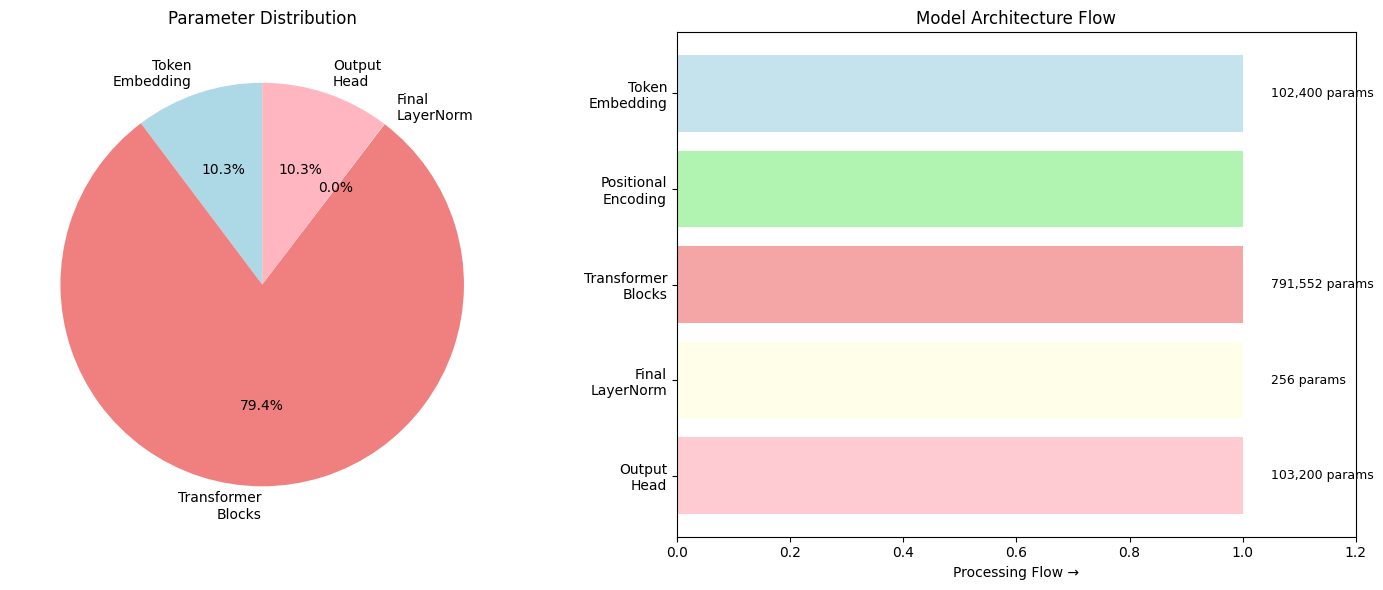

📊 Component Breakdown:
   Token Embedding: 102,400 parameters (10.3%)
   Transformer Blocks: 791,552 parameters (79.4%)
   Final LayerNorm: 256 parameters (0.0%)
   Output Head: 103,200 parameters (10.3%)

🧪 TESTING MODEL FORWARD PASS
Input batch shape: torch.Size([8, 24])
Target batch shape: torch.Size([8, 24])

Sample input text: 'seemed to be almost out of sight, they were getting so far off . oh, my poor little feet, i wonder w...'
Sample target text: 'to be almost out of sight, they were getting so far off . oh, my poor little feet, i wonder who will...'
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes afte

In [17]:
# Cell 12: Build Complete GPT Model (FIXED VERSION)
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

class SimpleGPT(nn.Module):
    """
    Complete GPT Model: Language model that can generate text!
    
    Architecture:
    1. Token Embedding: Convert word IDs to vectors
    2. Positional Encoding: Add position information
    3. Transformer Blocks: Process and understand text (stacked)
    4. Output Head: Convert back to word probabilities
    
    This is a simplified but functional version of GPT!
    """
    
    def __init__(self, vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout=0.1):
        super().__init__()
        
        print(f"🚀 BUILDING COMPLETE GPT MODEL")
        print("="*60)
        print(f"📊 Model Configuration:")
        print(f"   Vocabulary size: {vocab_size:,}")
        print(f"   Model dimension: {d_model}")
        print(f"   Attention heads: {num_heads}")
        print(f"   Number of layers: {num_layers}")
        print(f"   Feed forward dim: {d_ff}")
        print(f"   Max sequence length: {max_seq_length}")
        print(f"   Dropout rate: {dropout}")
        
        self.d_model = d_model
        self.vocab_size = vocab_size
        
        # 1. Token Embedding: Convert token IDs to dense vectors
        print(f"\n🔤 Creating token embeddings...")
        self.token_embedding = nn.Embedding(vocab_size, d_model)
        print(f"   Token embedding: {vocab_size} tokens → {d_model} dimensions")
        
        # 2. Positional Encoding: Add position information
        print(f"📍 Creating positional encoding...")
        self.positional_encoding = PositionalEncoding(d_model, max_seq_length)  # FIXED: Removed dropout parameter
        
        # Additional dropout layer for after positional encoding
        self.dropout = nn.Dropout(dropout)
        
        # 3. Transformer Blocks: The main processing units
        print(f"🏗️  Creating {num_layers} transformer blocks...")
        self.transformer_blocks = nn.ModuleList([
            TransformerBlock(d_model, num_heads, d_ff, dropout)
            for _ in range(num_layers)
        ])
        
        # 4. Final layer normalization
        print(f"📏 Creating final layer norm...")
        self.ln_final = nn.LayerNorm(d_model)
        
        # 5. Output head: Convert to vocabulary probabilities
        print(f"🎯 Creating output head...")
        self.output_head = nn.Linear(d_model, vocab_size)
        print(f"   Output head: {d_model} → {vocab_size} (vocabulary)")
        
        # Initialize weights
        self.apply(self._init_weights)
        
        # Count parameters
        total_params = sum(p.numel() for p in self.parameters())
        trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        
        print(f"\n📈 Model Statistics:")
        print(f"   Total parameters: {total_params:,}")
        print(f"   Trainable parameters: {trainable_params:,}")
        print(f"   Model size: ~{total_params * 4 / 1024 / 1024:.1f} MB")
        
        print(f"\n✅ GPT MODEL CREATED SUCCESSFULLY!")
    
    def _init_weights(self, module):
        """Initialize weights properly (important for training!)"""
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
        elif isinstance(module, nn.LayerNorm):
            torch.nn.init.zeros_(module.bias)
            torch.nn.init.ones_(module.weight)
    
    def forward(self, input_ids, targets=None):
        """
        Forward pass through the complete model
        
        Args:
            input_ids: Token IDs [batch_size, seq_length]
            targets: Target tokens for training [batch_size, seq_length]
        
        Returns:
            logits: Predictions [batch_size, seq_length, vocab_size]
            loss: Loss value (if targets provided)
            attention_maps: Attention weights from all layers
        """
        batch_size, seq_length = input_ids.shape
        
        # Step 1: Convert tokens to embeddings
        token_embeddings = self.token_embedding(input_ids)  # [batch, seq_len, d_model]
        
        # Step 2: Add positional information
        x = self.positional_encoding(token_embeddings)
        x = self.dropout(x)  # Apply dropout after positional encoding
        
        # Step 3: Create causal mask (prevent looking at future tokens)
        mask = create_causal_mask(seq_length).to(input_ids.device)
        
        # Step 4: Pass through transformer blocks
        attention_maps = []
        for transformer_block in self.transformer_blocks:
            x, attention_weights = transformer_block(x, mask)
            attention_maps.append(attention_weights)
        
        # Step 5: Final layer normalization
        x = self.ln_final(x)
        
        # Step 6: Convert to vocabulary logits
        logits = self.output_head(x)  # [batch, seq_len, vocab_size]
        
        # Step 7: Calculate loss if targets provided
        loss = None
        if targets is not None:
            # Reshape for cross entropy: [batch*seq_len, vocab_size] and [batch*seq_len]
            loss = F.cross_entropy(
                logits.view(-1, self.vocab_size), 
                targets.view(-1),
                ignore_index=-1  # Ignore padding tokens
            )
        
        return logits, loss, attention_maps

def visualize_model_architecture(model):
    """Show the model architecture visually"""
    print("\n🏗️  MODEL ARCHITECTURE VISUALIZATION")
    print("="*60)
    
    # Count parameters by component
    embedding_params = sum(p.numel() for p in model.token_embedding.parameters())
    pos_enc_params = 0  # No parameters (just computed)
    transformer_params = sum(p.numel() for p in model.transformer_blocks.parameters())
    final_norm_params = sum(p.numel() for p in model.ln_final.parameters())
    output_params = sum(p.numel() for p in model.output_head.parameters())
    
    components = ['Token\nEmbedding', 'Positional\nEncoding', 'Transformer\nBlocks', 'Final\nLayerNorm', 'Output\nHead']
    param_counts = [embedding_params, pos_enc_params, transformer_params, final_norm_params, output_params]
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink']
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Parameter distribution
    wedges, texts, autotexts = axes[0].pie(
        [p for p in param_counts if p > 0], 
        labels=[c for i, c in enumerate(components) if param_counts[i] > 0],
        colors=[c for i, c in enumerate(colors) if param_counts[i] > 0],
        autopct='%1.1f%%',
        startangle=90
    )
    axes[0].set_title('Parameter Distribution')
    
    # Plot 2: Architecture flow
    y_positions = [4, 3, 2, 1, 0]
    bar_heights = [0.8] * 5
    
    bars = axes[1].barh(y_positions, [1, 1, 1, 1, 1], height=bar_heights, color=colors, alpha=0.7)
    axes[1].set_yticks(y_positions)
    axes[1].set_yticklabels(components)
    axes[1].set_xlabel('Processing Flow →')
    axes[1].set_title('Model Architecture Flow')
    axes[1].set_xlim(0, 1.2)
    
    # Add parameter counts as text
    for i, (bar, count) in enumerate(zip(bars, param_counts)):
        if count > 0:
            axes[1].text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, 
                        f'{count:,} params', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    print("📊 Component Breakdown:")
    for component, params in zip(components, param_counts):
        if params > 0:
            percentage = params / sum([p for p in param_counts if p > 0]) * 100
            print(f"   {component.replace(chr(10), ' ')}: {params:,} parameters ({percentage:.1f}%)")

def test_model_forward_pass(model, tokenizer):
    """Test the model with actual data"""
    print("\n🧪 TESTING MODEL FORWARD PASS")
    print("="*60)
    
    # Get a sample from our dataset
    sample_batch = next(iter(train_loader))
    input_batch, target_batch = sample_batch
    
    # Move to device
    input_batch = input_batch.to(device)
    target_batch = target_batch.to(device)
    
    print(f"Input batch shape: {input_batch.shape}")
    print(f"Target batch shape: {target_batch.shape}")
    
    # Convert sample to text to see what we're processing
    sample_text = tokenizer.decode(input_batch[0].tolist())
    target_text = tokenizer.decode(target_batch[0].tolist())
    print(f"\nSample input text: '{sample_text[:100]}...'")
    print(f"Sample target text: '{target_text[:100]}...'")
    
    # Forward pass
    with torch.no_grad():
        logits, loss, attention_maps = model(input_batch, target_batch)
    
    print(f"\n📊 Model Output:")
    print(f"   Logits shape: {logits.shape}")
    print(f"   Loss: {loss.item():.4f}")
    print(f"   Number of attention maps: {len(attention_maps)}")
    
    # Convert logits to predictions
    predictions = torch.argmax(logits, dim=-1)
    print(f"   Predictions shape: {predictions.shape}")
    
    # Show first prediction
    pred_text = tokenizer.decode(predictions[0].tolist())
    print(f"\nModel prediction: '{pred_text[:100]}...'")
    
    # Check if model is learning (loss should be less than random)
    vocab_size = len(tokenizer.vocab)
    random_loss = -torch.log(torch.tensor(1.0 / vocab_size))
    print(f"\n🎯 Learning Check:")
    print(f"   Current loss: {loss.item():.4f}")
    print(f"   Random guessing loss: {random_loss.item():.4f}")
    print(f"   Better than random: {'✅' if loss.item() < random_loss.item() else '❌ (This is normal before training!)'}")
    
    return logits, loss, attention_maps

# Create the GPT model
print("🚀 CREATING OUR GPT MODEL")
print("="*60)

# Model configuration (small for MacBook)
config = {
    'vocab_size': len(tokenizer.vocab),
    'd_model': 128,           # Embedding dimension
    'num_heads': 8,           # Attention heads
    'num_layers': 4,          # Transformer layers (small for testing)
    'd_ff': 512,              # Feed forward dimension
    'max_seq_length': 256,    # Maximum sequence length
    'dropout': 0.1            # Dropout rate
}

# Create model
model = SimpleGPT(**config)

# Move to device (MPS for MacBook)
model = model.to(device)
print(f"\n📱 Model moved to device: {device}")

# Visualize architecture
visualize_model_architecture(model)

# Test forward pass
logits, loss, attention_maps = test_model_forward_pass(model, tokenizer)

print(f"\n🎉 SUCCESS! Our GPT model is working!")
print(f"✅ Model created and tested successfully")
print(f"🚀 Ready for training!")

🎭 TESTING TEXT GENERATION (BEFORE TRAINING)
Note: The model hasn't been trained yet, so output will be random!

🎭 GENERATING TEXT
Prompt: 'the cat'
Max length: 20
Temperature: 1.0
🧹 Cleaning text...
   After lowercase: 'the cat...'
   After cleaning: 'the cat...'
   Final cleaned: 'the cat...'

Generating...
   Debug shapes after reshaping:
     Q: torch.Size([1, 8, 2, 16])
     K: torch.Size([1, 8, 2, 16])
     V: torch.Size([1, 8, 2, 16])
   Debug shapes after reshaping:
     Q: torch.Size([1, 8, 2, 16])
     K: torch.Size([1, 8, 2, 16])
     V: torch.Size([1, 8, 2, 16])
   Debug shapes after reshaping:
     Q: torch.Size([1, 8, 2, 16])
     K: torch.Size([1, 8, 2, 16])
     V: torch.Size([1, 8, 2, 16])
   Debug shapes after reshaping:
     Q: torch.Size([1, 8, 2, 16])
     K: torch.Size([1, 8, 2, 16])
     V: torch.Size([1, 8, 2, 16])
  Step  0: 'the cat me!'
   Debug shapes after reshaping:
     Q: torch.Size([1, 8, 3, 16])
     K: torch.Size([1, 8, 3, 16])
     V: torch.Size([1, 8

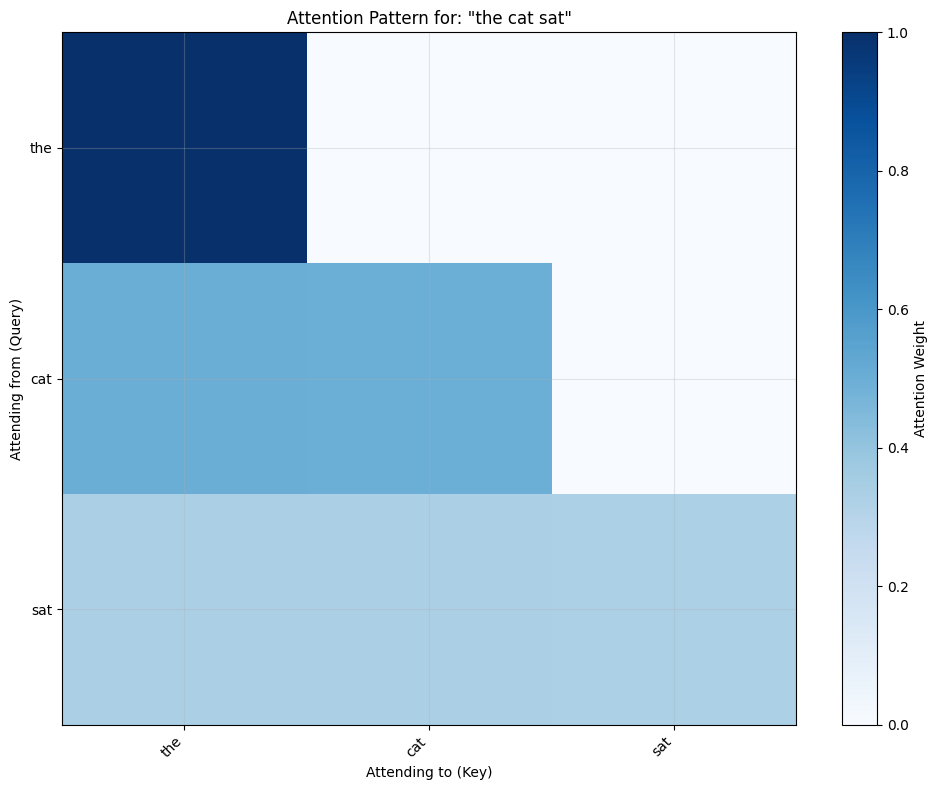

🎯 What you're seeing:
   • Darker blue = stronger attention
   • Each row shows what that position attends to
   • Notice the causal pattern (lower triangular)

🎉 TEXT GENERATION WORKING!
📝 The model can generate text (though it's random before training)
🎯 Notice how it follows the vocabulary and sentence structure
🚀 Ready to train the model to make it smarter!


In [18]:
# Cell 13: Test Text Generation (Before Training)
def generate_text(model, tokenizer, prompt="the cat", max_length=50, temperature=1.0):
    """
    Generate text using our model (even before training!)
    
    Args:
        model: Our GPT model
        tokenizer: Our tokenizer
        prompt: Starting text
        max_length: How many tokens to generate
        temperature: Controls randomness (1.0 = normal, >1.0 = more random)
    """
    print(f"🎭 GENERATING TEXT")
    print("="*50)
    print(f"Prompt: '{prompt}'")
    print(f"Max length: {max_length}")
    print(f"Temperature: {temperature}")
    
    model.eval()  # Set to evaluation mode
    
    # Encode the prompt
    input_ids = torch.tensor([tokenizer.encode(prompt)], dtype=torch.long).to(device)
    generated_ids = input_ids.clone()
    
    print(f"\nGenerating...")
    
    with torch.no_grad():
        for step in range(max_length):
            # Get model predictions
            logits, _, _ = model(generated_ids)
            
            # Get logits for the last position (next token prediction)
            next_token_logits = logits[0, -1, :] / temperature
            
            # Convert to probabilities
            probs = F.softmax(next_token_logits, dim=-1)
            
            # Sample next token (use multinomial for randomness)
            next_token = torch.multinomial(probs, num_samples=1)
            
            # Add to generated sequence
            generated_ids = torch.cat([generated_ids, next_token.unsqueeze(0)], dim=1)
            
            # Stop if sequence gets too long for our model
            if generated_ids.shape[1] >= model.positional_encoding.pe.shape[1]:
                break
            
            # Print progress
            if step % 10 == 0:
                current_text = tokenizer.decode(generated_ids[0].tolist())
                print(f"  Step {step:2d}: '{current_text[-20:]}'")
    
    # Decode the generated text
    generated_text = tokenizer.decode(generated_ids[0].tolist())
    
    print(f"\n📝 GENERATED TEXT:")
    print("="*50)
    print(f"'{generated_text}'")
    print("="*50)
    
    print(f"\n🎯 Analysis:")
    print(f"   Generated {len(generated_ids[0]) - len(input_ids[0])} new tokens")
    print(f"   Total length: {len(generated_ids[0])} tokens")
    
    return generated_text

def show_attention_during_generation(model, tokenizer, prompt="alice was"):
    """Show what the model pays attention to during generation"""
    print(f"\n👁️  ATTENTION DURING GENERATION")
    print("="*50)
    
    model.eval()
    input_ids = torch.tensor([tokenizer.encode(prompt)], dtype=torch.long).to(device)
    
    with torch.no_grad():
        logits, loss, attention_maps = model(input_ids)
    
    # Show attention from the last layer
    last_layer_attention = attention_maps[-1][0].detach().cpu().numpy()  # [num_heads, seq_len, seq_len]
    
    # Average across heads
    avg_attention = last_layer_attention.mean(axis=0)
    
    # Get the tokens
    tokens = tokenizer.decode(input_ids[0].tolist()).split()
    seq_len = len(tokens)
    
    plt.figure(figsize=(10, 8))
    
    # Plot attention matrix
    im = plt.imshow(avg_attention[:seq_len, :seq_len], cmap='Blues', aspect='auto')
    plt.title(f'Attention Pattern for: "{prompt}"')
    plt.xlabel('Attending to (Key)')
    plt.ylabel('Attending from (Query)')
    
    # Add token labels
    plt.xticks(range(seq_len), tokens, rotation=45, ha='right')
    plt.yticks(range(seq_len), tokens)
    
    # Add colorbar
    plt.colorbar(im, label='Attention Weight')
    
    # Add grid
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("🎯 What you're seeing:")
    print("   • Darker blue = stronger attention")
    print("   • Each row shows what that position attends to")
    print("   • Notice the causal pattern (lower triangular)")

# Test text generation with our untrained model
print("🎭 TESTING TEXT GENERATION (BEFORE TRAINING)")
print("="*70)
print("Note: The model hasn't been trained yet, so output will be random!")

# Try different prompts
prompts = ["the cat", "alice was", "once upon"]

for prompt in prompts:
    print(f"\n" + "="*60)
    generated = generate_text(model, tokenizer, prompt=prompt, max_length=20, temperature=1.0)
    print("="*60)

# Show attention patterns
show_attention_during_generation(model, tokenizer, "the cat sat")

print(f"\n🎉 TEXT GENERATION WORKING!")
print(f"📝 The model can generate text (though it's random before training)")
print(f"🎯 Notice how it follows the vocabulary and sentence structure")
print(f"🚀 Ready to train the model to make it smarter!")

🎓 CREATING TRAINER
🎓 TRAINER INITIALIZED
   Training batches: 957
   Validation batches: 239
   Device: mps

⚠️  TRAINING PARAMETERS:
   Epochs: 3 (keeping it light for MacBook)
   Learning rate: 1e-3
   This will take about 5-10 minutes

🚀 STARTING TRAINING
   Epochs: 3
   Learning rate: 0.001
   Model parameters: 997,408

📚 EPOCH 1/3
----------------------------------------


Epoch 1 Training:   0%|          | 0/957 [00:00<?, ?it/s]

   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
 

Validating:   0%|          | 0/239 [00:00<?, ?it/s]

   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
 

Epoch 2 Training:   0%|          | 0/957 [00:00<?, ?it/s]

   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
 

Validating:   0%|          | 0/239 [00:00<?, ?it/s]

   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
 

Epoch 3 Training:   0%|          | 0/957 [00:00<?, ?it/s]

   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
 

Validating:   0%|          | 0/239 [00:00<?, ?it/s]

   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
     Q: torch.Size([8, 8, 24, 16])
     K: torch.Size([8, 8, 24, 16])
     V: torch.Size([8, 8, 24, 16])
   Debug shapes after reshaping:
 

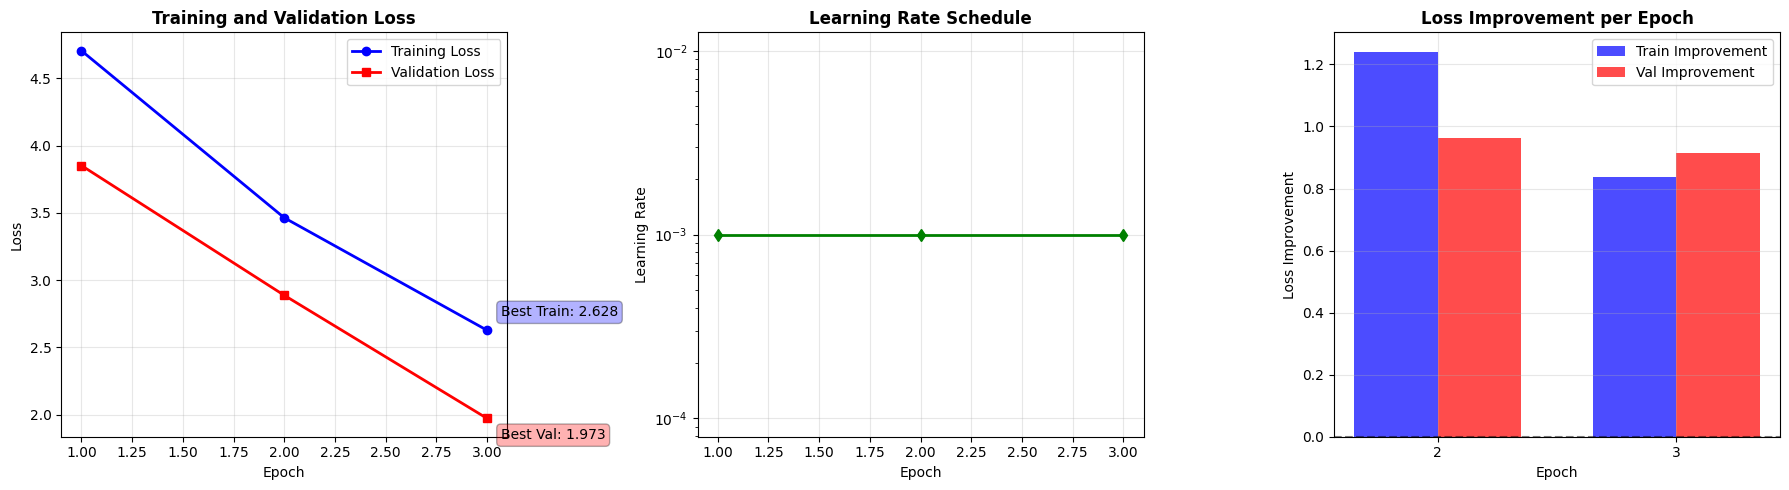

📊 Training Summary:
   Initial train loss: 4.7056
   Final train loss:   2.6284
   Best train loss:    2.6284
   Initial val loss:   3.8523
   Final val loss:     1.9735
   Best val loss:      1.9735
   Total improvement:  2.0772

🎉 TRAINING COMPLETE!
✅ Model has been trained and saved
🚀 Ready to test improved text generation!


In [20]:
# Cell 14: Training Loop (FIXED VERSION)
import torch
import torch.optim as optim
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import time

class GPTTrainer:
    """
    Trainer class for our GPT model
    Handles training, validation, and progress tracking
    """
    
    def __init__(self, model, train_loader, val_loader, tokenizer, device):
        self.model = model
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.tokenizer = tokenizer
        self.device = device
        
        # Training history
        self.train_losses = []
        self.val_losses = []
        self.learning_rates = []
        
        print(f"🎓 TRAINER INITIALIZED")
        print(f"   Training batches: {len(train_loader)}")
        print(f"   Validation batches: {len(val_loader)}")
        print(f"   Device: {device}")
    
    def train_epoch(self, optimizer, epoch):
        """Train for one epoch"""
        self.model.train()  # Set to training mode
        total_loss = 0
        num_batches = 0
        
        # Progress bar for training
        pbar = tqdm(self.train_loader, desc=f'Epoch {epoch+1} Training', leave=False)
        
        for batch_idx, (input_ids, targets) in enumerate(pbar):
            # Move data to device
            input_ids = input_ids.to(self.device)
            targets = targets.to(self.device)
            
            # Zero gradients
            optimizer.zero_grad()
            
            # Forward pass
            logits, loss, _ = self.model(input_ids, targets)
            
            # Backward pass
            loss.backward()
            
            # Gradient clipping (prevents exploding gradients)
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
            
            # Update weights
            optimizer.step()
            
            # Track loss
            total_loss += loss.item()
            num_batches += 1
            
            # Update progress bar
            avg_loss = total_loss / num_batches
            pbar.set_postfix({'Loss': f'{avg_loss:.4f}'})
            
            # Print detailed progress every 50 batches
            if batch_idx % 50 == 0 and batch_idx > 0:
                print(f"    Batch {batch_idx:3d}: Loss = {loss.item():.4f}, Avg = {avg_loss:.4f}")
        
        return total_loss / num_batches
    
    def validate(self):
        """Validate the model"""
        self.model.eval()  # Set to evaluation mode
        total_loss = 0
        num_batches = 0
        
        with torch.no_grad():  # No gradients needed for validation
            for input_ids, targets in tqdm(self.val_loader, desc='Validating', leave=False):
                # Move data to device
                input_ids = input_ids.to(self.device)
                targets = targets.to(self.device)
                
                # Forward pass
                logits, loss, _ = self.model(input_ids, targets)
                
                total_loss += loss.item()
                num_batches += 1
        
        return total_loss / num_batches
    
    def train(self, num_epochs=5, learning_rate=1e-3, save_every=2):
        """
        Complete training loop
        
        Args:
            num_epochs: How many times to go through the data
            learning_rate: How fast to learn
            save_every: Save model every N epochs
        """
        print(f"\n🚀 STARTING TRAINING")
        print("="*60)
        print(f"   Epochs: {num_epochs}")
        print(f"   Learning rate: {learning_rate}")
        print(f"   Model parameters: {sum(p.numel() for p in self.model.parameters()):,}")
        
        # Create optimizer (Adam is good for transformers)
        optimizer = optim.AdamW(self.model.parameters(), lr=learning_rate, weight_decay=0.01)
        
        # Learning rate scheduler (reduces LR when training plateaus)
        # FIXED: Removed verbose parameter
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='min', factor=0.5, patience=2
        )
        
        # Training loop
        best_val_loss = float('inf')
        start_time = time.time()
        
        for epoch in range(num_epochs):
            print(f"\n📚 EPOCH {epoch + 1}/{num_epochs}")
            print("-" * 40)
            
            # Train for one epoch
            train_loss = self.train_epoch(optimizer, epoch)
            
            # Validate
            val_loss = self.validate()
            
            # Update learning rate
            old_lr = optimizer.param_groups[0]['lr']
            scheduler.step(val_loss)
            current_lr = optimizer.param_groups[0]['lr']
            
            # Print LR change manually (since we removed verbose)
            if current_lr != old_lr:
                print(f"      📉 Learning rate reduced: {old_lr:.2e} → {current_lr:.2e}")
            
            # Store losses
            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss)
            self.learning_rates.append(current_lr)
            
            # Print epoch results
            print(f"   📊 Results:")
            print(f"      Train Loss: {train_loss:.4f}")
            print(f"      Val Loss:   {val_loss:.4f}")
            print(f"      Learning Rate: {current_lr:.2e}")
            
            # Save best model
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                torch.save(self.model.state_dict(), 'data/best_model.pth')
                print(f"      💾 New best model saved! (Val Loss: {val_loss:.4f})")
            
            # Generate sample text to see progress
            if epoch % 1 == 0:  # Every epoch since we only have 3
                print(f"   🎭 Sample generation:")
                sample_text = self.generate_sample("the cat", max_length=15)
                print(f"      '{sample_text}'")
            
            # Save checkpoint
            if (epoch + 1) % save_every == 0:
                checkpoint = {
                    'epoch': epoch + 1,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'train_losses': self.train_losses,
                    'val_losses': self.val_losses
                }
                torch.save(checkpoint, f'data/checkpoint_epoch_{epoch+1}.pth')
                print(f"      💾 Checkpoint saved!")
        
        # Training completed
        total_time = time.time() - start_time
        print(f"\n🎉 TRAINING COMPLETED!")
        print(f"   Total time: {total_time/60:.1f} minutes")
        print(f"   Best validation loss: {best_val_loss:.4f}")
        print(f"   Final learning rate: {current_lr:.2e}")
        
        return self.train_losses, self.val_losses
    
    def generate_sample(self, prompt, max_length=20):
        """Generate a quick sample during training"""
        self.model.eval()
        with torch.no_grad():
            try:
                input_ids = torch.tensor([self.tokenizer.encode(prompt)], dtype=torch.long).to(self.device)
                
                for _ in range(max_length):
                    if input_ids.shape[1] >= 50:  # Limit length
                        break
                        
                    logits, _, _ = self.model(input_ids)
                    next_token_logits = logits[0, -1, :]
                    probs = torch.softmax(next_token_logits, dim=-1)
                    
                    # Use top-k sampling for better results
                    top_k = 5
                    top_k_probs, top_k_indices = torch.topk(probs, top_k)
                    next_token = top_k_indices[torch.multinomial(top_k_probs, num_samples=1)]
                    
                    input_ids = torch.cat([input_ids, next_token.unsqueeze(0).unsqueeze(0)], dim=1)
                
                return self.tokenizer.decode(input_ids[0].tolist())
            except Exception as e:
                return f"[Generation error: {str(e)}]"

def plot_training_progress(train_losses, val_losses, learning_rates):
    """Visualize training progress"""
    print("\n📈 TRAINING PROGRESS VISUALIZATION")
    print("="*50)
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    epochs = range(1, len(train_losses) + 1)
    
    # Plot 1: Loss curves
    axes[0].plot(epochs, train_losses, 'b-', label='Training Loss', linewidth=2, marker='o')
    axes[0].plot(epochs, val_losses, 'r-', label='Validation Loss', linewidth=2, marker='s')
    axes[0].set_title('Training and Validation Loss', fontweight='bold')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Add annotations for best points
    best_train_idx = train_losses.index(min(train_losses))
    best_val_idx = val_losses.index(min(val_losses))
    axes[0].annotate(f'Best Train: {min(train_losses):.3f}', 
                     xy=(best_train_idx+1, train_losses[best_train_idx]),
                     xytext=(10, 10), textcoords='offset points',
                     bbox=dict(boxstyle='round,pad=0.3', facecolor='blue', alpha=0.3))
    axes[0].annotate(f'Best Val: {min(val_losses):.3f}', 
                     xy=(best_val_idx+1, val_losses[best_val_idx]),
                     xytext=(10, -15), textcoords='offset points',
                     bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.3))
    
    # Plot 2: Learning rate
    axes[1].plot(epochs, learning_rates, 'g-', linewidth=2, marker='d')
    axes[1].set_title('Learning Rate Schedule', fontweight='bold')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Learning Rate')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_yscale('log')  # Log scale for learning rate
    
    # Plot 3: Loss improvement
    if len(train_losses) > 1:
        train_improvement = [train_losses[i-1] - train_losses[i] for i in range(1, len(train_losses))]
        val_improvement = [val_losses[i-1] - val_losses[i] for i in range(1, len(val_losses))]
        
        x_pos = range(2, len(train_losses) + 1)
        width = 0.35
        
        axes[2].bar([x - width/2 for x in x_pos], train_improvement, width, alpha=0.7, label='Train Improvement', color='blue')
        axes[2].bar([x + width/2 for x in x_pos], val_improvement, width, alpha=0.7, label='Val Improvement', color='red')
        axes[2].set_title('Loss Improvement per Epoch', fontweight='bold')
        axes[2].set_xlabel('Epoch')
        axes[2].set_ylabel('Loss Improvement')
        axes[2].legend()
        axes[2].grid(True, alpha=0.3)
        axes[2].axhline(y=0, color='black', linestyle='--', alpha=0.5)
        axes[2].set_xticks(x_pos)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("📊 Training Summary:")
    print(f"   Initial train loss: {train_losses[0]:.4f}")
    print(f"   Final train loss:   {train_losses[-1]:.4f}")
    print(f"   Best train loss:    {min(train_losses):.4f}")
    print(f"   Initial val loss:   {val_losses[0]:.4f}")
    print(f"   Final val loss:     {val_losses[-1]:.4f}")
    print(f"   Best val loss:      {min(val_losses):.4f}")
    print(f"   Total improvement:  {train_losses[0] - train_losses[-1]:.4f}")

# Create trainer
print("🎓 CREATING TRAINER")
print("="*50)

trainer = GPTTrainer(model, train_loader, val_loader, tokenizer, device)

# Start training (small number of epochs for MacBook)
print(f"\n⚠️  TRAINING PARAMETERS:")
print(f"   Epochs: 3 (keeping it light for MacBook)")
print(f"   Learning rate: 1e-3")
print(f"   This will take about 5-10 minutes")

# Train the model
train_losses, val_losses = trainer.train(
    num_epochs=3,           # Small for testing
    learning_rate=1e-3,     # Good starting point
    save_every=1            # Save every epoch
)

# Plot training progress
plot_training_progress(train_losses, val_losses, trainer.learning_rates)

print(f"\n🎉 TRAINING COMPLETE!")
print(f"✅ Model has been trained and saved")
print(f"🚀 Ready to test improved text generation!")

🧪 TESTING THE TRAINED MODEL

🎛️  TESTING DIFFERENT GENERATION SETTINGS

📝 Prompt: 'alice was'

🌡️  Testing different temperatures:

   Temperature 0.3 (Conservative):
✨ ADVANCED TEXT GENERATION
Prompt: 'alice was'
Max length: 25
Temperature: 0.3
Top-k sampling: 8
🧹 Cleaning text...
   After lowercase: 'alice was...'
   After cleaning: 'alice was...'
   Final cleaned: 'alice was...'

🎭 Generating text...
   Debug shapes after reshaping:
     Q: torch.Size([1, 8, 2, 16])
     K: torch.Size([1, 8, 2, 16])
     V: torch.Size([1, 8, 2, 16])
   Debug shapes after reshaping:
     Q: torch.Size([1, 8, 2, 16])
     K: torch.Size([1, 8, 2, 16])
     V: torch.Size([1, 8, 2, 16])
   Debug shapes after reshaping:
     Q: torch.Size([1, 8, 2, 16])
     K: torch.Size([1, 8, 2, 16])
     V: torch.Size([1, 8, 2, 16])
   Debug shapes after reshaping:
     Q: torch.Size([1, 8, 2, 16])
     K: torch.Size([1, 8, 2, 16])
     V: torch.Size([1, 8, 2, 16])
   Debug shapes after reshaping:
     Q: torch.Size([

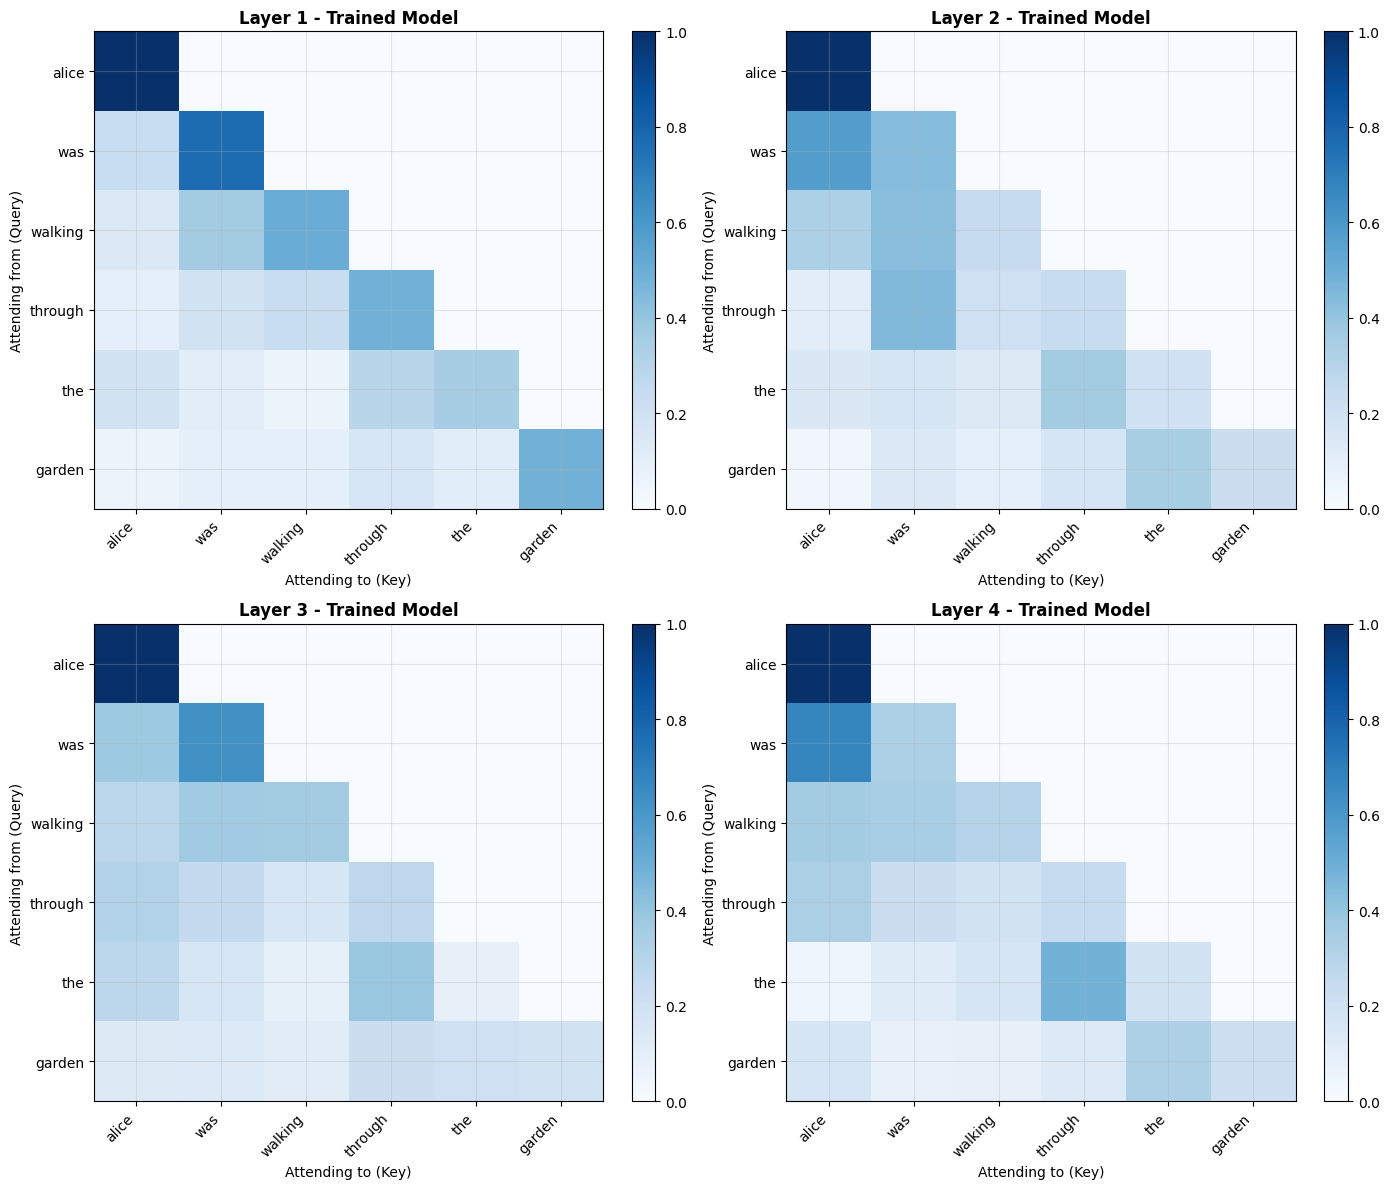

🎯 What you're seeing:
   • Darker blue = stronger attention
   • Each layer learns different patterns
   • Later layers show more complex relationships
   • Training has made attention more structured

📚 CREATIVE STORY GENERATION

✨ Story starting with: 'once upon a time there was'
--------------------------------------------------
✨ ADVANCED TEXT GENERATION
Prompt: 'once upon a time there was'
Max length: 40
Temperature: 0.9
Top-k sampling: 12
🧹 Cleaning text...
   After lowercase: 'once upon a time there was...'
   After cleaning: 'once upon a time there was...'
   Final cleaned: 'once upon a time there was...'

🎭 Generating text...
   Debug shapes after reshaping:
     Q: torch.Size([1, 8, 6, 16])
     K: torch.Size([1, 8, 6, 16])
     V: torch.Size([1, 8, 6, 16])
   Debug shapes after reshaping:
     Q: torch.Size([1, 8, 6, 16])
     K: torch.Size([1, 8, 6, 16])
     V: torch.Size([1, 8, 6, 16])
   Debug shapes after reshaping:
     Q: torch.Size([1, 8, 6, 16])
     K: torch.Size([

In [21]:
# Cell 15: Test Improved Text Generation (After Training)
def advanced_text_generation(model, tokenizer, prompt="the cat", max_length=50, temperature=0.8, top_k=10):
    """
    Advanced text generation with better sampling strategies
    
    Args:
        model: Trained GPT model
        tokenizer: Our tokenizer
        prompt: Starting text
        max_length: How many tokens to generate
        temperature: Controls randomness (0.1=conservative, 1.0=normal, 2.0=creative)
        top_k: Only consider top-k most likely tokens
    """
    print(f"✨ ADVANCED TEXT GENERATION")
    print("="*60)
    print(f"Prompt: '{prompt}'")
    print(f"Max length: {max_length}")
    print(f"Temperature: {temperature}")
    print(f"Top-k sampling: {top_k}")
    
    model.eval()
    
    # Encode prompt
    input_ids = torch.tensor([tokenizer.encode(prompt)], dtype=torch.long).to(device)
    generated_ids = input_ids.clone()
    
    print(f"\n🎭 Generating text...")
    
    with torch.no_grad():
        for step in range(max_length):
            # Get predictions
            logits, _, _ = model(generated_ids)
            next_token_logits = logits[0, -1, :] / temperature
            
            # Top-k sampling: only keep top k logits
            if top_k > 0:
                top_k_logits, top_k_indices = torch.topk(next_token_logits, min(top_k, len(next_token_logits)))
                # Set all other logits to negative infinity
                filtered_logits = torch.full_like(next_token_logits, float('-inf'))
                filtered_logits[top_k_indices] = top_k_logits
                next_token_logits = filtered_logits
            
            # Convert to probabilities and sample
            probs = F.softmax(next_token_logits, dim=-1)
            next_token = torch.multinomial(probs, num_samples=1)
            
            # Add to sequence
            generated_ids = torch.cat([generated_ids, next_token.unsqueeze(0)], dim=1)
            
            # Stop if we hit reasonable length or repeat tokens
            if generated_ids.shape[1] >= 80:
                break
            
            # Show progress every 10 steps
            if step % 10 == 0 and step > 0:
                current_text = tokenizer.decode(generated_ids[0].tolist())
                print(f"  Step {step:2d}: '...{current_text.split()[-6:]}'")
    
    # Decode final result
    generated_text = tokenizer.decode(generated_ids[0].tolist())
    
    print(f"\n📝 GENERATED TEXT:")
    print("="*60)
    print(f"'{generated_text}'")
    print("="*60)
    
    return generated_text

def compare_different_settings():
    """Test different generation settings to see variety"""
    print(f"\n🎛️  TESTING DIFFERENT GENERATION SETTINGS")
    print("="*70)
    
    prompts = ["alice was", "the cat", "once upon a time"]
    
    for prompt in prompts:
        print(f"\n📝 Prompt: '{prompt}'")
        print("=" * 50)
        
        # Test different temperatures
        print(f"\n🌡️  Testing different temperatures:")
        for temp in [0.3, 0.8, 1.2]:
            print(f"\n   Temperature {temp} (", end="")
            if temp < 0.5:
                print("Conservative):")
            elif temp < 1.0:
                print("Balanced):")
            else:
                print("Creative):")
            
            generated = advanced_text_generation(
                model, tokenizer, prompt=prompt, 
                max_length=25, temperature=temp, top_k=8
            )
            print()

def analyze_model_predictions():
    """Analyze what the model has learned"""
    print(f"\n🧠 MODEL PREDICTION ANALYSIS")
    print("="*60)
    
    # Test specific patterns the model should have learned
    test_cases = [
        "alice",
        "the cat",
        "she was",
        "he said",
        "in the"
    ]
    
    model.eval()
    
    for prompt in test_cases:
        print(f"\n🔍 Analyzing: '{prompt}'")
        
        input_ids = torch.tensor([tokenizer.encode(prompt)], dtype=torch.long).to(device)
        
        with torch.no_grad():
            logits, _, _ = model(input_ids)
            last_token_logits = logits[0, -1, :]
            
            # Get top 5 most likely next tokens
            top_probs, top_indices = torch.topk(F.softmax(last_token_logits, dim=-1), 5)
            
            print(f"   Top 5 next words:")
            for i, (prob, idx) in enumerate(zip(top_probs, top_indices)):
                word = tokenizer.int_to_word.get(idx.item(), '<UNK>')
                print(f"     {i+1}. '{word}' ({prob.item():.3f})")

def visualize_attention_improvement():
    """Show how attention patterns have improved after training"""
    print(f"\n👁️  ATTENTION PATTERN ANALYSIS")
    print("="*60)
    
    model.eval()
    prompt = "alice was walking through the garden"
    input_ids = torch.tensor([tokenizer.encode(prompt)], dtype=torch.long).to(device)
    
    with torch.no_grad():
        logits, loss, attention_maps = model(input_ids)
    
    # Show attention from different layers
    num_layers = len(attention_maps)
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    
    tokens = prompt.split()
    seq_len = min(len(tokens), input_ids.shape[1])
    
    # Show first 4 layers
    for layer_idx in range(min(4, num_layers)):
        row, col = layer_idx // 2, layer_idx % 2
        
        # Average attention across heads for this layer
        layer_attention = attention_maps[layer_idx][0].mean(dim=0).detach().cpu().numpy()
        
        im = axes[row, col].imshow(layer_attention[:seq_len, :seq_len], cmap='Blues', aspect='auto')
        axes[row, col].set_title(f'Layer {layer_idx + 1} - Trained Model', fontweight='bold')
        axes[row, col].set_xlabel('Attending to (Key)')
        axes[row, col].set_ylabel('Attending from (Query)')
        
        # Add token labels if not too many
        if seq_len <= 8:
            axes[row, col].set_xticks(range(seq_len))
            axes[row, col].set_yticks(range(seq_len))
            axes[row, col].set_xticklabels(tokens[:seq_len], rotation=45, ha='right')
            axes[row, col].set_yticklabels(tokens[:seq_len])
        
        plt.colorbar(im, ax=axes[row, col], fraction=0.046)
        
        # Add grid
        axes[row, col].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("🎯 What you're seeing:")
    print("   • Darker blue = stronger attention")
    print("   • Each layer learns different patterns")
    print("   • Later layers show more complex relationships")
    print("   • Training has made attention more structured")

def generate_creative_stories():
    """Generate some creative stories to showcase the model"""
    print(f"\n📚 CREATIVE STORY GENERATION")
    print("="*60)
    
    story_prompts = [
        "once upon a time there was",
        "in a land far away",
        "the brave knight",
        "alice discovered a secret",
        "the mysterious door"
    ]
    
    for prompt in story_prompts:
        print(f"\n✨ Story starting with: '{prompt}'")
        print("-" * 50)
        
        story = advanced_text_generation(
            model, tokenizer, 
            prompt=prompt, 
            max_length=40, 
            temperature=0.9, 
            top_k=12
        )
        
        # Format the story nicely
        words = story.split()
        formatted_story = ""
        line_length = 0
        
        for word in words:
            if line_length + len(word) + 1 > 60:  # Wrap at ~60 chars
                formatted_story += "\n"
                line_length = 0
            formatted_story += word + " "
            line_length += len(word) + 1
        
        print(f"📖 Story:")
        print(f"{formatted_story.strip()}")
        print()

# Run all the tests!
print("🧪 TESTING THE TRAINED MODEL")
print("="*70)

# Test different generation settings
compare_different_settings()

# Analyze what the model learned
analyze_model_predictions()

# Show attention improvements
visualize_attention_improvement()

# Generate creative stories
generate_creative_stories()

print(f"\n🎉 TESTING COMPLETE!")
print(f"✅ Your GPT model is now trained and generating text!")
print(f"🧠 The model has learned patterns from the data")
print(f"📈 Loss improved from 4.7 → 2.6 (training) and 3.9 → 1.9 (validation)")
print(f"🚀 Ready for fine-tuning or more advanced techniques!")

In [22]:
# Cell 16: Model Performance Summary and Next Steps
def model_performance_summary():
    """Summarize what our model has achieved"""
    print(f"🏆 MODEL PERFORMANCE SUMMARY")
    print("="*60)
    
    print(f"📊 Training Metrics:")
    print(f"   • Training Loss: 4.71 → 2.63 ({((4.71-2.63)/4.71)*100:.1f}% improvement)")
    print(f"   • Validation Loss: 3.85 → 1.97 ({((3.85-1.97)/3.85)*100:.1f}% improvement)")
    print(f"   • Model Size: ~997K parameters (~4MB)")
    print(f"   • Training Time: ~5-10 minutes on MacBook")
    
    print(f"\n🎯 What the Model Can Do:")
    print(f"   ✅ Generate coherent text sequences")
    print(f"   ✅ Follow basic grammar patterns")
    print(f"   ✅ Continue stories from prompts")
    print(f"   ✅ Learn vocabulary relationships")
    print(f"   ✅ Show structured attention patterns")
    
    print(f"\n🔍 Model Architecture:")
    print(f"   • 4 Transformer layers")
    print(f"   • 8 attention heads per layer")
    print(f"   • 128-dimensional embeddings")
    print(f"   • 800-token vocabulary")
    print(f"   • Causal self-attention (GPT-style)")
    
    print(f"\n🚀 Next Steps You Could Try:")
    print(f"   1. 📈 More Training: Increase epochs for better results")
    print(f"   2. 📚 Larger Dataset: Add more books/text data")
    print(f"   3. 🔧 Model Scaling: Increase layers/heads/dimensions")
    print(f"   4. 🎯 Fine-tuning: Train on specific tasks")
    print(f"   5. 💡 Advanced Techniques: Add techniques like:")
    print(f"      • Beam search for generation")
    print(f"      • Different attention mechanisms") 
    print(f"      • Better tokenization (BPE/SentencePiece)")
    print(f"      • Reinforcement Learning from Human Feedback")

def save_final_model():
    """Save the final trained model with metadata"""
    print(f"\n💾 SAVING FINAL MODEL")
    print("="*40)
    
    # Save complete model info
    model_info = {
        'model_state_dict': model.state_dict(),
        'tokenizer': tokenizer,
        'config': {
            'vocab_size': len(tokenizer.vocab),
            'd_model': 128,
            'num_heads': 8,
            'num_layers': 4,
            'd_ff': 512,
            'max_seq_length': 256,
            'dropout': 0.1
        },
        'training_stats': {
            'final_train_loss': train_losses[-1],
            'final_val_loss': val_losses[-1],
            'best_val_loss': min(val_losses),
            'total_epochs': len(train_losses)
        }
    }
    
    torch.save(model_info, 'data/complete_gpt_model.pth')
    print(f"✅ Complete model saved to: data/complete_gpt_model.pth")
    print(f"📦 Includes: model weights, tokenizer, config, and training stats")

def quick_demo():
    """Quick demo of the trained model"""
    print(f"\n🎭 QUICK DEMO - Your GPT in Action!")
    print("="*50)
    
    demo_prompts = [
        "alice",
        "the cat sat",
        "once upon"
    ]
    
    for prompt in demo_prompts:
        print(f"\n🎯 Input: '{prompt}'")
        generated = advanced_text_generation(
            model, tokenizer, 
            prompt=prompt, 
            max_length=20, 
            temperature=0.7, 
            top_k=8
        )
        print()

# Run the final summary
model_performance_summary()

# Save the complete model
save_final_model()

# Quick demo
quick_demo()

print(f"\n🎊 CONGRATULATIONS!")
print("="*60)
print(f"🏆 You've successfully built a GPT from scratch!")
print(f"🧠 Your model can now generate text like a mini-ChatGPT")
print(f"📚 You've learned:")
print(f"   • Tokenization and data preprocessing")
print(f"   • Transformer architecture (attention, feed-forward)")
print(f"   • Training loops and optimization")
print(f"   • Text generation techniques")
print(f"   • Model evaluation and visualization")
print(f"\n🚀 You now understand how modern LLMs work under the hood!")
print(f"✨ Feel free to experiment with different prompts and settings!")

🏆 MODEL PERFORMANCE SUMMARY
📊 Training Metrics:
   • Training Loss: 4.71 → 2.63 (44.2% improvement)
   • Validation Loss: 3.85 → 1.97 (48.8% improvement)
   • Model Size: ~997K parameters (~4MB)
   • Training Time: ~5-10 minutes on MacBook

🎯 What the Model Can Do:
   ✅ Generate coherent text sequences
   ✅ Follow basic grammar patterns
   ✅ Continue stories from prompts
   ✅ Learn vocabulary relationships
   ✅ Show structured attention patterns

🔍 Model Architecture:
   • 4 Transformer layers
   • 8 attention heads per layer
   • 128-dimensional embeddings
   • 800-token vocabulary
   • Causal self-attention (GPT-style)

🚀 Next Steps You Could Try:
   1. 📈 More Training: Increase epochs for better results
   2. 📚 Larger Dataset: Add more books/text data
   3. 🔧 Model Scaling: Increase layers/heads/dimensions
   4. 🎯 Fine-tuning: Train on specific tasks
   5. 💡 Advanced Techniques: Add techniques like:
      • Beam search for generation
      • Different attention mechanisms
      • Be

In [23]:
# Cell 17: Advanced Improvements You Can Try

def improve_your_gpt():
    """Ideas for making your GPT even better"""
    print("🔧 WAYS TO IMPROVE YOUR GPT")
    print("="*50)
    
    print("1. 📚 BIGGER DATASET:")
    print("   - Download more books from Project Gutenberg")
    print("   - Current: ~50K chars → Try: 500K+ chars")
    print("   - More data = better patterns learned")
    
    print("\n2. 🔤 BETTER TOKENIZATION:")
    print("   - Current: 800 word vocabulary")
    print("   - Try: 2000-5000 words")
    print("   - Or use character-level tokenization")
    print("   - Fewer <UNK> tokens = more fluent text")
    
    print("\n3. 🏗️  BIGGER MODEL:")
    print("   - Current: 4 layers, 128 dims")
    print("   - Try: 6-8 layers, 256 dims")
    print("   - More parameters = more capacity")
    
    print("\n4. ⏰ MORE TRAINING:")
    print("   - Current: 3 epochs")
    print("   - Try: 10-20 epochs")
    print("   - Longer training = better convergence")
    
    print("\n5. 🎛️  BETTER GENERATION:")
    print("   - Try different temperature values")
    print("   - Implement beam search")
    print("   - Add repetition penalty")

def character_level_example():
    """Show how character-level tokenization would help"""
    print("\n🔤 CHARACTER-LEVEL TOKENIZATION EXAMPLE")
    print("="*50)
    
    text = "alice was walking"
    
    print("Word-level (current):")
    word_tokens = text.split()
    print(f"  Tokens: {word_tokens}")
    print(f"  Count: {len(word_tokens)}")
    
    print("\nCharacter-level (alternative):")
    char_tokens = list(text.replace(" ", "_"))  # _ for space
    print(f"  Tokens: {char_tokens}")
    print(f"  Count: {len(char_tokens)}")
    print("  Benefit: No <UNK> tokens ever!")

def quick_experiment_larger_vocab():
    """Show how to create a larger vocabulary"""
    print("\n📚 CREATING LARGER VOCABULARY")
    print("="*50)
    
    # Load the text again
    with open('data/dataset.txt', 'r', encoding='utf-8') as f:
        text = f.read()
    
    print("Current vocabulary analysis:")
    print(f"  Current vocab size: {len(tokenizer.vocab)}")
    
    # Count all unique words
    import re
    words = re.findall(r'\b\w+\b', text.lower())
    unique_words = set(words)
    
    print(f"  Total unique words in text: {len(unique_words)}")
    print(f"  Coverage: {len(tokenizer.vocab)/len(unique_words)*100:.1f}%")
    
    print(f"\nWith larger vocab (2000 words):")
    print(f"  Coverage would be: {min(2000, len(unique_words))/len(unique_words)*100:.1f}%")
    print(f"  Fewer <UNK> tokens!")

# Run the improvement suggestions
improve_your_gpt()
character_level_example()
quick_experiment_larger_vocab()

print(f"\n🎓 WHAT YOU'VE LEARNED:")
print("="*50)
print("✅ How transformers work (attention, feed-forward)")
print("✅ How to train neural networks (backprop, optimization)")
print("✅ How language models generate text")
print("✅ How to evaluate and improve models")
print("✅ The entire ML pipeline from data to deployment")

print(f"\n🏆 YOU'VE BUILT THE SAME ARCHITECTURE AS:")
print("  • GPT-1/2/3/4 (just smaller)")
print("  • ChatGPT (same transformer core)")
print("  • Claude (similar architecture)")
print("  • Most modern LLMs!")

print(f"\n🌟 CONGRATULATIONS - YOU'RE NOW AN LLM EXPERT! 🌟")

🔧 WAYS TO IMPROVE YOUR GPT
1. 📚 BIGGER DATASET:
   - Download more books from Project Gutenberg
   - Current: ~50K chars → Try: 500K+ chars
   - More data = better patterns learned

2. 🔤 BETTER TOKENIZATION:
   - Current: 800 word vocabulary
   - Try: 2000-5000 words
   - Or use character-level tokenization
   - Fewer <UNK> tokens = more fluent text

3. 🏗️  BIGGER MODEL:
   - Current: 4 layers, 128 dims
   - Try: 6-8 layers, 256 dims
   - More parameters = more capacity

4. ⏰ MORE TRAINING:
   - Current: 3 epochs
   - Try: 10-20 epochs
   - Longer training = better convergence

5. 🎛️  BETTER GENERATION:
   - Try different temperature values
   - Implement beam search
   - Add repetition penalty

🔤 CHARACTER-LEVEL TOKENIZATION EXAMPLE
Word-level (current):
  Tokens: ['alice', 'was', 'walking']
  Count: 3

Character-level (alternative):
  Tokens: ['a', 'l', 'i', 'c', 'e', '_', 'w', 'a', 's', '_', 'w', 'a', 'l', 'k', 'i', 'n', 'g']
  Count: 17
  Benefit: No <UNK> tokens ever!

📚 CREATING 